In [1]:
import pandas as pd
import cufflinks as cf
import warnings
import sys
#import matplotlib.pyplot as plt
import numpy as np
from  functools import reduce
warnings.filterwarnings("ignore")
cf.go_offline()
pd.set_option("display.max_columns",200)

In [2]:
def aux_outliers(a,b,c):
    a=set(a)
    b=set(b)
    c=set(c)
    
    a_=a.intersection(b)

    b_=b.intersection(c)

    c_=a.intersection(c)

    outliers_index=list(set(list(a_)+list(b_)+list(c_)))
    return outliers_index

In [3]:
def chi_square(df,col,valor_miss):
    x_i=df[col].fillna(valor_miss).value_counts()
    k=x_i.sum()
    p_i=df[col].dropna().value_counts(1)
    m_i=k*p_i
    chi=chisquare(f_obs=x_i,f_exp=m_i)
    p_val=chi.pvalue
    alpha=0.05
    if p_val<alpha:
        print("Rechazamos HO(La porporción de categorias es la misma que la general)")
    else:
        print("Aceptamos HO(La porporción de categorias es la misma que la general)")

**Visual Studio Code - docstring**

In [4]:
sys.path.append("../libreria/")

In [5]:
from libreria import rename_cols,completitud,text_clean,box,histogram

In [6]:
df=pd.read_csv("../data/visualizaciones/dataset_house_prices.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../data/visualizaciones/dataset_house_prices.csv'

In [ ]:
df

In [7]:
df.shape

NameError: name 'df' is not defined

**El problema**

En análisis exploratorio tiene el objetivo de entender el significado y la relevancia de cada variable con respecto al problema. Además apartir de este análisis se pueden determinar que acciones tomar para cada variable En este caso:

- La relevancia de la variable en la compra de una casa.
- La importancia de la variable.
- Solapamiento con otras variables.


Variable objetivo : 'SalePrice'.

- MSSubClass: clase de construcción
- MSZoning: clasificación de la zona
- LotFrontage: pies lineales de calle de la parcela
- LotArea: tamaño de la parcela en pies cuadrados
- Street: tipo de acceso por carretera
- Alley: tipo de acceso al callejón
- LotShape: forma de la parcela
- LandContour: planitud de la parcela
- Utilities: servicios públicos disponibles
- LotConfig: Configuración de parcela
- LandSlope: pendiente de la parcela
- Neighborhood: ubicación física dentro de los límites de la ciudad de Ames
- Condition1: proximidad a la carretera principal o al ferrocarril
- Condition2: proximidad a la carretera principal o al ferrocarril (si hay un segundo)
- BldgType: tipo de vivienda
- HouseStyle: estilo de vivienda
- OverallQual: calidad general del material y del acabado
- OverallCond: condición general
- YearBuilt: fecha original de construcción
- YearRemodAdd: fecha de remodelación
- RoofStyle: tipo de cubierta
- RoofMatl: material del techo
- Exterior1st: revestimiento exterior de la casa
- Exterior2nd: revestimiento exterior de la casa (si hay más de un material)
- MasVnrType: tipo de revestimiento de mampostería
- MasVnrArea: área de revestimiento de mampostería en pies cuadrados
- ExterQual: calidad del material exterior
- ExterCond: estado del material en el exterior
- Foundation: tipo de cimentación
- BsmtQual: altura del sótano
- BsmtCond: estado general del sótano
- BsmtExposure: paredes del sótano a nivel de calle o de jardín
- BsmtFinType1: calidad del área acabada del sótano
- BsmtFinSF1: pies cuadrados de la superficie acabada tipo 1
- BsmtFinType2: calidad de la segunda superficie acabada (si existe)
- BsmtFinSF2: Pies cuadrados de la superficie acabada tipo 2
- BsmtUnfSF: pies cuadrados del área sin terminar del sótano
- TotalBsmtSF: pies cuadrados totales del sótano
- Heating: tipo de calefacción
- HeatingQC: calidad y estado de la calefacción
- CentralAir: aire acondicionado central
- Electrical: sistema eléctrico
- 1erFlrSF: área en pies cuadrados de la primera planta (o planta baja)
- 2ndFlrSF: área en pies cuadrados de la segunda planta
- LowQualFinSF: pies cuadrados acabados de baja calidad (todos los pisos)
- GrLivArea: superficie habitable por encima del nivel del suelo en pies cuadrados
- BsmtFullBath: cuartos de baño completos en el sótano
- BsmtHalfBath: medio baño del sótano
- FullBath: baños completos sobre el nivel del suelo
- HalfBath: medios baños sobre el nivel del suelo
- Bedroom: número de dormitorios por encima del nivel del sótano
- Kitchen: número de cocinas
- KitchenQual: calidad de la cocina
- TotRmsAbvGrd: total de habitaciones por encima del nivel del suelo (no incluye baños)
- Functional: valoración de la funcionalidad de la vivienda
- Fireplaces: número de chimeneas
- FireplaceQu: calidad de la chimenea
- GarageType: ubicación del garaje
- GarageYrBlt: año de construcción del garaje
- GarageFinish: acabado interior del garaje
- GarageCars: tamaño del garaje en capacidad de coches
- GarageArea: tamaño del garaje en pies cuadrados
- GarageQual: calidad de garaje
- GarageCond: condición de garaje
- PavedDrive: calzada asfaltada
- WoodDeckSF: area de plataforma de madera en pies cuadrados
- OpenPorchSF: área de porche abierto en pies cuadrados
- EnclosedPorch: área de porche cerrada en pies cuadrados
- 3SsnPorch: área de porche de tres estaciones en pies cuadrados
- ScreenPorch: superficie acristalada del porche en pies cuadrados
- PoolArea: área de la piscina en pies cuadrados
- PoolQC: calidad de la piscina
- Fence: calidad de la valla
- MiscFeature: característica miscelánea no cubierta en otras categorías
- MiscVal: valor en dólares de la característica miscelánea
- MoSold: mes de venta
- YrSold: año de venta
- SaleType: tipo de venta
- SaleCondition: Condiciones de venta

In [8]:
v_feats=["MSSubClass","MSZoning","Street","Alley","LotShape","LandContour","Utilities","LotConfig","LandSlope","Condition1","Condition2","BldgType","HouseStyle","OverallQual","OverallCond",
        "YearBuilt","YearRemodAdd","RoofStyle","RoofMatl","MasVnrType","ExterQual",
        "ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
        "Heating","HeatingQC","CentralAir","Electrical","LowQualFinSF","BsmtHalfBath","FullBath","KitchenAbvGr","KitchenQual","Functional","Fireplaces","FireplaceQu",
        "GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond","PavedDrive","PoolQC","Fence",
        "MiscFeature","MoSold","YrSold","SaleType","SaleCondition"]
c_feats=["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
        "2ndFlrSF","GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch",
        "PoolArea","MiscVal","BedroomAbvGr","HalfBath","GarageCars","BsmtFullBath","TotRmsAbvGrd"]
tgt=["SalePrice"]

df=rename_cols(df,v_feats,"v_")
df=rename_cols(df,c_feats,"c_")
df=rename_cols(df,tgt,"tgt_")

NameError: name 'df' is not defined

In [9]:
df.drop(columns=["Neighborhood","Exterior2nd","Exterior1st"],inplace=True)

NameError: name 'df' is not defined

In [11]:
histogram(df,"tgt_SalePrice",5,"tgt_SalePrice").show()

In [12]:
miss=completitud(df)

In [13]:
miss

columna  total  completitud
0        v_PoolQC   1453     0.479452
1   v_MiscFeature   1406     3.698630
2         v_Alley   1369     6.232877
3         v_Fence   1179    19.246575
4   v_FireplaceQu    690    52.739726
..            ...    ...          ...
73    v_ExterQual      0   100.000000
74     v_RoofMatl      0   100.000000
75    v_RoofStyle      0   100.000000
76   c_BsmtFinSF2      0   100.000000
77  tgt_SalePrice      0   100.000000

[78 rows x 3 columns]

In [14]:
null_cols=list(miss[miss["completitud"]<80]["columna"].values)

In [15]:
null_cols

['v_PoolQC', 'v_MiscFeature', 'v_Alley', 'v_Fence', 'v_FireplaceQu']

In [16]:
df=df.drop(columns=null_cols)

In [17]:
df["v_MSSubClass"]=df["v_MSSubClass"].astype(int)

In [18]:
for col in df.filter(like="c_"):
    df[col]=df[col].astype(float)

In [19]:
for col in df.filter(like="c_"):
    print(col)
    histogram(df,col,15,col).show()
    box(df,col,col).show()
    print("\n")

c_LotFrontage




c_LotArea




c_MasVnrArea




c_BsmtFinSF1




c_BsmtFinSF2




c_BsmtUnfSF




c_TotalBsmtSF




c_1stFlrSF




c_2ndFlrSF




c_GrLivArea




c_BsmtFullBath




c_HalfBath




c_BedroomAbvGr




c_TotRmsAbvGrd




c_GarageCars




c_GarageArea




c_WoodDeckSF




c_OpenPorchSF




c_EnclosedPorch




c_3SsnPorch




c_ScreenPorch




c_PoolArea




c_MiscVal


In [20]:
df_multi=df.copy()

## OUTLIERS

**c_LotFrontage**

### IQR

In [21]:
# LotFrontage: pies lineales de calle de la parcela

- Una regla de uso común dice que un punto de datos es un valor atípico si es más de 1.5 IQR por encima del tercer cuartil o por debajo del primer cuartil. Dicho de otra manera, los valores atípicos bajos están debajo Q1-1.5 IQR  y los valores atípicos altos están por encima Q3+1.5 IQR

In [22]:
histogram(df,"c_LotFrontage",15,"c_LotFrontage")

In [23]:
col="c_LotFrontage"

In [24]:
q1 = df[col].quantile(.25)

In [25]:
q1

59.0

In [26]:
q3 = df[col].quantile(.75)

In [27]:
q3

80.0

In [28]:
iqr = q3 - q1

In [29]:
iqr

21.0

In [30]:
ub = q3 + 1.5 * iqr

In [31]:
lb = q1 - 1.5 * iqr

In [32]:
ub

111.5

In [33]:
lb

27.5

In [34]:
df[col].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: c_LotFrontage, dtype: float64

In [35]:
q1 = df[col].quantile(.25)
q3 = df[col].quantile(.75)
iqr = q3 - q1

In [36]:
ub = q3 + 1.5 * iqr
lb = q1 - 1.5 * iqr

In [37]:
ub

111.5

In [38]:
lb

27.5

In [39]:
df[col].describe(percentiles=[.01,.02,.05,.03,.04,.95,.96,.98,.99])

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
1%         21.000000
2%         24.000000
3%         24.000000
4%         32.000000
5%         34.000000
50%        69.000000
95%       107.000000
96%       110.000000
98%       124.000000
99%       141.000000
max       313.000000
Name: c_LotFrontage, dtype: float64

In [40]:
ub

111.5

In [41]:
lb

27.5

In [42]:
df.shape[0]

1460

In [43]:
n_iqr=df[(df[col] <= lb) | (df[col] >= ub)][col].shape[0]

In [44]:
n_iqr

88

In [45]:
(88/df.shape[0])*100

6.027397260273973

In [46]:
lb_iqr=lb
ub_iqr=ub

In [47]:
df[(df[col] < lb) | (df[col] > ub)][col].describe()

count     88.000000
mean      83.897727
std       66.174454
min       21.000000
25%       21.000000
50%      114.000000
75%      129.000000
max      313.000000
Name: c_LotFrontage, dtype: float64

### Percentiles
-Usualmente se toma como banda inferior el percentil 5 y 95 como banda superior

In [48]:
df[col].describe(percentiles=np.arange(0.1,1,.1))

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
10%        44.000000
20%        53.000000
30%        60.000000
40%        63.000000
50%        69.000000
60%        74.000000
70%        79.000000
80%        85.000000
90%        96.000000
max       313.000000
Name: c_LotFrontage, dtype: float64

In [49]:
df[col].describe(percentiles=[.01,.05,.95,.99,.98])

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
1%         21.000000
5%         34.000000
50%        69.000000
95%       107.000000
98%       124.000000
99%       141.000000
max       313.000000
Name: c_LotFrontage, dtype: float64

In [50]:
lb = df[col].quantile(.05)
ub = df[col].quantile(.95)

In [51]:
df[col].describe(percentiles=[.05,.95])

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
5%         34.000000
50%        69.000000
95%       107.000000
max       313.000000
Name: c_LotFrontage, dtype: float64

In [52]:
df[col].describe(percentiles=np.arange(0.1,1.1,.1))

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
10%        44.000000
20%        53.000000
30%        60.000000
40%        63.000000
50%        69.000000
60%        74.000000
70%        79.000000
80%        85.000000
90%        96.000000
100%      313.000000
max       313.000000
Name: c_LotFrontage, dtype: float64

In [53]:
lb

34.0

In [54]:
ub

107.0

In [55]:
df[(df[col] < lb) | (df[col] > ub)][col].describe()

count    112.000000
mean      80.973214
std       61.610000
min       21.000000
25%       24.000000
50%      108.000000
75%      121.250000
max      313.000000
Name: c_LotFrontage, dtype: float64

In [56]:
n_percentiles=df[(df[col] < lb) | (df[col] > ub)][col].shape[0]

In [57]:
n_percentiles

112

In [58]:
lb_per=lb
ub_per=ub

In [59]:
df.shape

(1460, 73)

In [60]:
n_percentiles

112

In [61]:
n_iqr

88

### Z-SCORE

**Pruebas de normalidad estadística**
- Hay muchas pruebas estadísticas que podemos utilizar para cuantificar si una muestra de datos parece extraída de una distribución gaussiana.

- Cada prueba hace diferentes suposiciones y considera diferentes aspectos de los datos.


**Interpretación de una prueba**


- Estadístico : una cantidad calculada por la prueba que se puede interpretar en el contexto de la prueba comparándola con los valores críticos de la distribución de la estadística de prueba.
- valor p : se utiliza para interpretar la prueba, en este caso si la muestra se extrajo de una distribución gaussiana.

- Cada prueba calcula una estadística específica de la prueba. Esta estadística puede ayudar en la interpretación del resultado, aunque puede requerir un dominio más profundo de la estadística y un conocimiento más profundo de la prueba estadística específica. En cambio, el valor p se puede utilizar para interpretar la estadística de forma rápida y precisa en aplicaciones prácticas.

- Las pruebas suponen que la muestra se extrajo de una distribución gaussiana. Técnicamente, esto se llama hipótesis nula o H0. Se elige un nivel de umbral llamado alfa, típicamente 5% (o 0.05), que se usa para interpretar el valor p.

- En la implementación de SciPy de estas pruebas, puede interpretar el valor p de la siguiente manera.

- p <= alfa : rechazar H0, no es normal.
- p> alpha : falla al rechazar H0, normal.
- Esto significa que, en general, estamos buscando resultados con un valor p mayor para confirmar que nuestra muestra probablemente se extrajo de una distribución gaussiana.

- Un resultado superior al 5% no significa que la hipótesis nula sea cierta. Significa que es muy probable que sea cierto dada la evidencia disponible. El valor p no es la probabilidad de que los datos se ajusten a una distribución gaussiana; se puede considerar como un valor que nos ayuda a interpretar la prueba estadística.

- **Valor P:**
Coloquialmente, cuál es la probabilidad de observar lo que se dio en el estudio asumiendo que ambas variables no están asociadas. Por consenso, se ha fijado un valor umbral de probabilidad del 5% que es conocido como nivel de significación o α para decidir cuál hipótesis es la cierta. Si la probabilidad es baja (<5%) significaría que lo observado es muy infrecuente, por lo que se opta por rechazar la hipótesis nula y asumir que las variables están asociadas. Esto es lo que se conoce como algo estadísticamente significativo, que nada tiene que ver con que los hallazgos sean clínicamente relevantes.

**Ejemplo**

- Si un ensayo detectara que un tratamiento disminuye la incidencia de una complicación en un 2% con un valor p de 0,01, quiere decir que, por azar, esta disminución en complicación ocurre en un 1% de los casos.


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html

**Prueba de Shapiro-Wilk**

Se cree que la prueba de Shapiro-Wilk es una prueba confiable de normalidad, aunque se sugiere que la prueba puede ser adecuada para muestras de datos más pequeñas, por ejemplo, miles de observaciones o menos.

- Shapiro cuando n<50

 

In [62]:
df[col].isnull().sum()

259

In [63]:
col

'c_LotFrontage'

In [64]:
list(df[col].dropna().values)

[65.0,
 80.0,
 68.0,
 60.0,
 84.0,
 85.0,
 75.0,
 51.0,
 50.0,
 70.0,
 85.0,
 91.0,
 51.0,
 72.0,
 66.0,
 70.0,
 101.0,
 57.0,
 75.0,
 44.0,
 110.0,
 60.0,
 98.0,
 47.0,
 60.0,
 50.0,
 85.0,
 70.0,
 60.0,
 108.0,
 112.0,
 74.0,
 68.0,
 65.0,
 84.0,
 115.0,
 70.0,
 61.0,
 48.0,
 84.0,
 33.0,
 66.0,
 52.0,
 110.0,
 68.0,
 60.0,
 100.0,
 24.0,
 89.0,
 66.0,
 60.0,
 63.0,
 60.0,
 44.0,
 50.0,
 76.0,
 72.0,
 47.0,
 81.0,
 95.0,
 69.0,
 74.0,
 85.0,
 60.0,
 21.0,
 50.0,
 72.0,
 60.0,
 100.0,
 32.0,
 78.0,
 80.0,
 121.0,
 122.0,
 40.0,
 105.0,
 60.0,
 60.0,
 85.0,
 80.0,
 60.0,
 69.0,
 78.0,
 73.0,
 85.0,
 77.0,
 77.0,
 64.0,
 94.0,
 75.0,
 60.0,
 50.0,
 85.0,
 105.0,
 75.0,
 77.0,
 61.0,
 34.0,
 74.0,
 90.0,
 65.0,
 50.0,
 75.0,
 55.0,
 48.0,
 60.0,
 55.0,
 69.0,
 69.0,
 88.0,
 75.0,
 78.0,
 80.0,
 82.0,
 73.0,
 65.0,
 70.0,
 78.0,
 71.0,
 78.0,
 70.0,
 24.0,
 51.0,
 63.0,
 120.0,
 107.0,
 84.0,
 60.0,
 60.0,
 92.0,
 100.0,
 134.0,
 110.0,
 95.0,
 55.0,
 40.0,
 62.0,
 86.0,
 62.0,
 141.0,
 4

In [65]:
len(list(df[col].dropna().values))

1201

In [66]:
df[col].isnull().sum()

259

In [67]:
from  scipy.stats  import  shapiro
stat , p =shapiro(list(df[col].dropna().values))

In [68]:
stat

0.880407452583313

In [69]:
p

2.003834562954084e-29

In [70]:
alpha = 0.05
if p > alpha:
    print( 'La muestra parece una Normal (No se rechaza H0)')
else:
    print('La muestra no parece una Normal (Se rechaza H0)')

La muestra no parece una Normal (Se rechaza H0)


In [71]:
histogram(df,col,15,col)

**Kolmogorov**


In [72]:
from scipy.stats import kstest

In [73]:
kstest(df[col].dropna(),'norm')

KstestResult(statistic=1.0, pvalue=0.0)

**D'Agostino's K2Prueba**
- El D'Agostino'sK2La prueba calcula estadísticas de resumen a partir de los datos, a saber, la curtosis y la asimetría, para determinar si la distribución de datos se aparta de la distribución normal, llamada así por Ralph D'Agostino.

In [74]:
from  scipy.stats  import  normaltest
stat ,  p  =  normaltest(list(df[col].dropna().values))

In [75]:
p

1.4681641688591098e-149

In [76]:
alpha = 0.05
if p > alpha:
    print('La muestra parece una Normal (No se rechaza H0)')
else:
    print('La muestra no parece una Normal (Se rechaza H0)')

La muestra no parece una Normal (Se rechaza H0)


## Ejemplo

In [77]:
from scipy.stats import zscore
#Calcule la puntuación z de cada valor de la muestra, en relación con la media y la desviación estándar de la muestra.

In [78]:
zscore(df[col].dropna().values,nan_policy='omit')

array([-0.20803433,  0.40989452, -0.08444856, ..., -0.16683907,
       -0.08444856,  0.20391824])

In [79]:
df[col].dropna().values

array([65., 80., 68., ..., 66., 68., 75.])

In [80]:
np.abs(zscore(df[col].dropna().values,nan_policy='omit'))

array([0.20803433, 0.40989452, 0.08444856, ..., 0.16683907, 0.08444856,
       0.20391824])

In [81]:
#Calcular el z-score
z=np.abs(zscore(df[col].dropna().values,nan_policy='omit'))
#Definimos el número de desviaciones
threshold=3
#Indices a eliminar de la tabla
np.where(z>3)

(array([ 161,  189,  260,  672,  754,  773,  915,  930,  974, 1000, 1069,
        1102]),)

In [82]:
n_zscore=len(np.where(z>3)[0])

In [83]:
n_zscore

12

In [84]:
10

10

In [85]:
df[col].describe(percentiles=[.1,.90,.99])

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
10%        44.000000
50%        69.000000
90%        96.000000
99%       141.000000
max       313.000000
Name: c_LotFrontage, dtype: float64

In [86]:
df.loc[[ 161,  189,  260,  672,  754,  773,  915,  930,  974, 1000, 1069,
        1102],col]

161     110.0
189      41.0
260     120.0
672       NaN
754      61.0
773      70.0
915      21.0
930      73.0
974      60.0
1000     74.0
1069     60.0
1102     70.0
Name: c_LotFrontage, dtype: float64

In [87]:
list(df[col].dropna().values)[1102]

153.0

In [88]:
print(f"Número de outliers por IQR:{n_iqr}")
print(f"Banda inferior IQR:{lb_iqr}")
print(f"Banda superior IQR:{ub_iqr}")
print(f"Número de outliers por Percentiles:{n_percentiles}")
print(f"Banda inferior Percentiles:{lb_per}")
print(f"Banda superior Percentiles:{ub_per}")
print(f"Número de outliers por Z-Score:{n_zscore}")

Número de outliers por IQR:88
Banda inferior IQR:27.5
Banda superior IQR:111.5
Número de outliers por Percentiles:112
Banda inferior Percentiles:34.0
Banda superior Percentiles:107.0
Número de outliers por Z-Score:12


## Funcion Outliers

In [89]:
df.filter(like="c_")

c_LotFrontage  c_LotArea  c_MasVnrArea  c_BsmtFinSF1  c_BsmtFinSF2  \
0              65.0     8450.0         196.0         706.0           0.0   
1              80.0     9600.0           0.0         978.0           0.0   
2              68.0    11250.0         162.0         486.0           0.0   
3              60.0     9550.0           0.0         216.0           0.0   
4              84.0    14260.0         350.0         655.0           0.0   
...             ...        ...           ...           ...           ...   
1455           62.0     7917.0           0.0           0.0           0.0   
1456           85.0    13175.0         119.0         790.0         163.0   
1457           66.0     9042.0           0.0         275.0           0.0   
1458           68.0     9717.0           0.0          49.0        1029.0   
1459           75.0     9937.0           0.0         830.0         290.0   

      c_BsmtUnfSF  c_TotalBsmtSF  c_1stFlrSF  c_2ndFlrSF  c_GrLivArea  \
0           150.0          856.0       856.0       854.0       1710.0   
1           284.0         1262.0      1262.0         0.0       1262.0   
2           434.0          920.0       920.0       866.0       1786.0   
3           540.0          756.0       961.0       756.0       1717.0   
4           490.0         1145.0      1145.0      1053.0       2198.0   
...           ...            ...         ...         ...          ...   
1455        953.0          953.0       953.0       694.0       1647.0   
1456        589.0         1542.0      2073.0         0.0       2073.0   
1457        877.0         1152.0      1188.0      1152.0       2340.0   
1458          0.0         1078.0      1078.0         0.0       1078.0   
1459        136.0         1256.0      1256.0         0.0       1256.0   

      c_BsmtFullBath  c_HalfBath  c_BedroomAbvGr  c_TotRmsAbvGrd  \
0                1.0         1.0             3.0             8.0   
1                0.0         0.0             3.0             6.0   
2                1.0         1.0             3.0             6.0   
3                1.0         0.0             3.0             7.0   
4                1.0         1.0             4.0             9.0   
...              ...         ...             ...             ...   
1455             0.0         1.0             3.0             7.0   
1456             1.0         0.0             3.0             7.0   
1457             0.0         0.0             4.0             9.0   
1458             1.0         0.0             2.0             5.0   
1459             1.0         1.0             3.0             6.0   

      c_GarageCars  c_GarageArea  c_WoodDeckSF  c_OpenPorchSF  \
0              2.0         548.0           0.0           61.0   
1              2.0         460.0         298.0            0.0   
2              2.0         608.0           0.0           42.0   
3              3.0         642.0           0.0           35.0   
4              3.0         836.0         192.0           84.0   
...            ...           ...           ...            ...   
1455           2.0         460.0           0.0           40.0   
1456           2.0         500.0         349.0            0.0   
1457           1.0         252.0           0.0           60.0   
1458           1.0         240.0         366.0            0.0   
1459           1.0         276.0         736.0           68.0   

      c_EnclosedPorch  c_3SsnPorch  c_ScreenPorch  c_PoolArea  c_MiscVal  
0                 0.0          0.0            0.0         0.0        0.0  
1                 0.0          0.0            0.0         0.0        0.0  
2                 0.0          0.0            0.0         0.0        0.0  
3               272.0          0.0            0.0         0.0        0.0  
4                 0.0          0.0            0.0         0.0        0.0  
...               ...          ...            ...         ...        ...  
1455              0.0          0.0            0.0         0.0        0.0  
1456              

In [1]:
def OUTLIERS(df,cols):
    results=pd.DataFrame()
    data_iqr=df.copy()
    data_per=df.copy()
    total=[]
    total_per=[]
    total_z=[]
    indices_=[]

    for col in cols:
        #IQR
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        INF=Q1-1.5*(IQR)
        SUP=Q3+1.5*(IQR)
    
        
        n_outliers=df[(df[col] < INF) | (df[col] > SUP)].shape[0]
        total.append(n_outliers)
        indices_iqr=list(df[(df[col] < INF) | (df[col] > SUP)].index)
        #data_iqr=data_iqr[~(data_iqr[col] < INF) | (data_iqr[col] > SUP)].reset_index(drop=True)
        
        #Percentiles
        INF_pe=np.percentile(df[col].dropna(),5)
    
        SUP_pe=np.percentile(df[col].dropna(),95)
        n_outliers_per=df[(df[col] < INF_pe) | (df[col] > SUP_pe)].shape[0]
        total_per.append(n_outliers_per)
        indices_per=list(df[(df[col] < INF_pe) | (df[col] > SUP_pe)].index)
        #data_per=data_per[~(data_per[col] < INF_pe) | (data_per[col] > SUP_pe)].reset_index(drop=True)
        
        #MEAN CHANGE
        
        #Obtenemos todos los percentiles además del máximo
        perc_100 = [x / 100 for x in range(100)]
        dist = df[col].describe(perc_100).iloc[4:]
        #Obtenemos el cambio entre percentiles
        change_dist = df[col].describe(perc_100).iloc[4:].diff()
        #Obtenemos el cambio promedio entre percentiles
        mean_change = df[col].describe(
            perc_100).iloc[4:].diff().mean()
        #Si el cambio entre el percentil 99 y el maximo es mayor a el cambio promedio entonces:
        if change_dist["max"] > mean_change:
            #La banda superior será el máximo menos el cambio promedio
            ub = dist["max"] - mean_change
            #si la banda superior es más pequeña que el percentil 99 , modificamos la banda para que tome el percentil 99
            if ub < dist["99%"]:
                ub = dist["99%"]
        else:
        #Si el cambio entre el percentil 99 y el maximo es menor o igual a el cambio promedio entonces se toma el percentil 99
            ub = dist["max"]

        if change_dist["1%"] > mean_change:
            lb = dist["0%"] + mean_change
            if lb > dist["1%"]:
                lb = dist["1%"]
        else:
            lb = dist["0%"]
        n_total_z=df[(df[col] < lb) | (df[col] > ub)].shape[0]
        total_z.append(n_total_z)
        indices_z=list(df[(df[col] < lb) | (df[col] > ub)].index)
        
        indices_.append(aux_outliers(indices_iqr,indices_per,indices_z))
        
    results["features"]=cols
    results["n_outliers_IQR"]=total
    results["n_outliers_Percentil"]=total_per
    results["n_outliers_Mean_Change"]=total_z
    results["n_outliers_IQR_%"]=round((results["n_outliers_IQR"]/df.shape[0])*100,2)
    results["n_outliers_Percentil_%"]=round((results["n_outliers_Percentil"]/df.shape[0])*100,2)
    results["n_outliers_Mean_Change_%"]=round((results["n_outliers_Mean_Change"]/df.shape[0])*100,2)
    results["indices"]=indices_
    results["total_outliers"]=results["indices"].map(lambda x:len(x))
    results["%_outliers"]=results["indices"].map(lambda x:round(((len(x)/df.shape[0])*100),2))
    results=results[['features', 'n_outliers_IQR', 'n_outliers_Percentil',
       'n_outliers_Mean_Change', 'n_outliers_IQR_%', 'n_outliers_Percentil_%',
       'n_outliers_Mean_Change_%',  'total_outliers', '%_outliers','indices']]
    return results

In [90]:
col="c_LotFrontage"

In [91]:
results=pd.DataFrame()
data_iqr=df.copy()
data_per=df.copy()
total=[]
total_per=[]
total_z=[]
indices_=[]

In [92]:
Q1=df[col].quantile(0.25)
Q3=df[col].quantile(0.75)
IQR=Q3-Q1
INF=Q1-1.5*(IQR)
SUP=Q3+1.5*(IQR)


n_outliers=df[(df[col] < INF) | (df[col] > SUP)].shape[0]
total.append(n_outliers)
indices_iqr=list(df[(df[col] < INF) | (df[col] > SUP)].index)
#data_iqr=data_iqr[~(data_iqr[col] < INF) | (data_iqr[col] > SUP)].reset_index(drop=True)

#Percentiles
INF_pe=np.percentile(df[col].dropna(),5)

SUP_pe=np.percentile(df[col].dropna(),95)
n_outliers_per=df[(df[col] < INF_pe) | (df[col] > SUP_pe)].shape[0]
total_per.append(n_outliers_per)
indices_per=list(df[(df[col] < INF_pe) | (df[col] > SUP_pe)].index)
#data_per=data_per[~(data_per[col] < INF_pe) | (data_per[col] > SUP_pe)].reset_index(drop=True)

#MEAN CHANGE

#Obtenemos todos los percentiles además del máximo
perc_100 = [x / 100 for x in range(100)]
dist = df[col].describe(perc_100).iloc[4:]
#Obtenemos el cambio entre percentiles
change_dist = df[col].describe(perc_100).iloc[4:].diff()
#Obtenemos el cambio promedio entre percentiles
mean_change = df[col].describe(
    perc_100).iloc[4:].diff().mean()
#Si el cambio entre el percentil 99 y el maximo es mayor a el cambio promedio entonces:
if change_dist["max"] > mean_change:
    #La banda superior será el máximo menos el cambio promedio
    ub = dist["max"] - mean_change
    #si la banda superior es más pequeña que el percentil 99 , modificamos la banda para que tome el percentil 99
    if ub < dist["99%"]:
        ub = dist["99%"]
else:
#Si el cambio entre el percentil 99 y el maximo es menor o igual a el cambio promedio entonces se toma el percentil 99
    ub = dist["max"]

if change_dist["1%"] > mean_change:
    lb = dist["0%"] + mean_change
    if lb > dist["1%"]:
        lb = dist["1%"]
else:
    lb = dist["0%"]
n_total_z=df[(df[col] < lb) | (df[col] > ub)].shape[0]
total_z.append(n_total_z)
indices_z=list(df[(df[col] < lb) | (df[col] > ub)].index)

indices_.append(aux_outliers(indices_iqr,indices_per,indices_z))

In [93]:
len(indices_iqr)

88

In [94]:
len(indices_per)

112

In [95]:
col

'c_LotFrontage'

In [96]:
indices_z

[934, 1298]

In [97]:
df

Id  v_MSSubClass v_MSZoning  c_LotFrontage  c_LotArea v_Street  \
0        1            60         RL           65.0     8450.0     Pave   
1        2            20         RL           80.0     9600.0     Pave   
2        3            60         RL           68.0    11250.0     Pave   
3        4            70         RL           60.0     9550.0     Pave   
4        5            60         RL           84.0    14260.0     Pave   
...    ...           ...        ...            ...        ...      ...   
1455  1456            60         RL           62.0     7917.0     Pave   
1456  1457            20         RL           85.0    13175.0     Pave   
1457  1458            70         RL           66.0     9042.0     Pave   
1458  1459            20         RL           68.0     9717.0     Pave   
1459  1460            20         RL           75.0     9937.0     Pave   

     v_LotShape v_LandContour v_Utilities v_LotConfig v_LandSlope  \
0           Reg           Lvl      AllPub      Inside         Gtl   
1           Reg           Lvl      AllPub         FR2         Gtl   
2           IR1           Lvl      AllPub      Inside         Gtl   
3           IR1           Lvl      AllPub      Corner         Gtl   
4           IR1           Lvl      AllPub         FR2         Gtl   
...         ...           ...         ...         ...         ...   
1455        Reg           Lvl      AllPub      Inside         Gtl   
1456        Reg           Lvl      AllPub      Inside         Gtl   
1457        Reg           Lvl      AllPub      Inside         Gtl   
1458        Reg           Lvl      AllPub      Inside         Gtl   
1459        Reg           Lvl      AllPub      Inside         Gtl   

     v_Condition1 v_Condition2 v_BldgType v_HouseStyle  v_OverallQual  \
0            Norm         Norm       1Fam       2Story              7   
1           Feedr         Norm       1Fam       1Story              6   
2            Norm         Norm       1Fam       2Story              7   
3            Norm         Norm       1Fam       2Story              7   
4            Norm         Norm       1Fam       2Story              8   
...           ...          ...        ...          ...            ...   
1455         Norm         Norm       1Fam       2Story              6   
1456         Norm         Norm       1Fam       1Story              6   
1457         Norm         Norm       1Fam       2Story              7   
1458         Norm         Norm       1Fam       1Story              5   
1459         Norm         Norm       1Fam       1Story              5   

      v_OverallCond  v_YearBuilt  v_YearRemodAdd v_RoofStyle v_RoofMatl  \
0                 5         2003            2003       Gable    CompShg   
1                 8         1976            1976       Gable    CompShg   
2                 5         2001            2002       Gable    CompShg   
3                 5         1915            1970       Gable    CompShg   
4                 5         2000            2000       Gable    CompShg   
...             ...          ...             ...         ...        ...   
1455              5         1999            2000       Gable    CompShg   
1456              6         1978            1988       Gable    CompShg   
1457              9         1941            2006       Gable    CompShg   
1458              6         1950            1996         Hip    CompShg   
1459              6         1965            1965       Gable    CompShg   

     v_MasVnrType  c_MasVnrArea v_ExterQual v_ExterCond v_Foundation  \
0         BrkFace         196.0          Gd          TA        PConc   
1            None           0.0          TA          TA       CBlock   
2         BrkFace         162.0          Gd          TA        PConc   
3            None           0.0          TA          TA       BrkTil   
4         BrkFace         350.0          Gd          TA        PConc   
...           ...           ...         ...         ...          ...   
1455    

In [98]:
def OUTLIERS(df,cols):
    results=pd.DataFrame()
    data_iqr=df.copy()
    data_per=df.copy()
    total=[]
    total_per=[]
    total_z=[]
    indices_=[]

    for col in cols:
        #IQR
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        INF=Q1-1.5*(IQR)
        SUP=Q3+1.5*(IQR)
    
        
        n_outliers=df[(df[col] < INF) | (df[col] > SUP)].shape[0]
        total.append(n_outliers)
        indices_iqr=list(df[(df[col] < INF) | (df[col] > SUP)].index)
        #data_iqr=data_iqr[~(data_iqr[col] < INF) | (data_iqr[col] > SUP)].reset_index(drop=True)
        
        #Percentiles
        INF_pe=np.percentile(df[col].dropna(),5)
    
        SUP_pe=np.percentile(df[col].dropna(),95)
        n_outliers_per=df[(df[col] < INF_pe) | (df[col] > SUP_pe)].shape[0]
        total_per.append(n_outliers_per)
        indices_per=list(df[(df[col] < INF_pe) | (df[col] > SUP_pe)].index)
        #data_per=data_per[~(data_per[col] < INF_pe) | (data_per[col] > SUP_pe)].reset_index(drop=True)
        
        #MEAN CHANGE
        
        #Obtenemos todos los percentiles además del máximo
        perc_100 = [x / 100 for x in range(100)]
        dist = df[col].describe(perc_100).iloc[4:]
        #Obtenemos el cambio entre percentiles
        change_dist = df[col].describe(perc_100).iloc[4:].diff()
        #Obtenemos el cambio promedio entre percentiles
        mean_change = df[col].describe(
            perc_100).iloc[4:].diff().mean()
        #Si el cambio entre el percentil 99 y el maximo es mayor a el cambio promedio entonces:
        if change_dist["max"] > mean_change:
            #La banda superior será el máximo menos el cambio promedio
            ub = dist["max"] - mean_change
            #si la banda superior es más pequeña que el percentil 99 , modificamos la banda para que tome el percentil 99
            if ub < dist["99%"]:
                ub = dist["99%"]
        else:
        #Si el cambio entre el percentil 99 y el maximo es menor o igual a el cambio promedio entonces se toma el percentil 99
            ub = dist["max"]

        if change_dist["1%"] > mean_change:
            lb = dist["0%"] + mean_change
            if lb > dist["1%"]:
                lb = dist["1%"]
        else:
            lb = dist["0%"]
        n_total_z=df[(df[col] < lb) | (df[col] > ub)].shape[0]
        total_z.append(n_total_z)
        indices_z=list(df[(df[col] < lb) | (df[col] > ub)].index)
        
        indices_.append(aux_outliers(indices_iqr,indices_per,indices_z))
        
    results["features"]=cols
    results["n_outliers_IQR"]=total
    results["n_outliers_Percentil"]=total_per
    results["n_outliers_Mean_Change"]=total_z
    results["n_outliers_IQR_%"]=round((results["n_outliers_IQR"]/df.shape[0])*100,2)
    results["n_outliers_Percentil_%"]=round((results["n_outliers_Percentil"]/df.shape[0])*100,2)
    results["n_outliers_Mean_Change_%"]=round((results["n_outliers_Mean_Change"]/df.shape[0])*100,2)
    results["indices"]=indices_
    results["total_outliers"]=results["indices"].map(lambda x:len(x))
    results["%_outliers"]=results["indices"].map(lambda x:round(((len(x)/df.shape[0])*100),2))
    results=results[['features', 'n_outliers_IQR', 'n_outliers_Percentil',
       'n_outliers_Mean_Change', 'n_outliers_IQR_%', 'n_outliers_Percentil_%',
       'n_outliers_Mean_Change_%',  'total_outliers', '%_outliers','indices']]
    return results
def aux_outliers(a,b,c):
    a=set(a)
    b=set(b)
    c=set(c)
    
    a_=a.intersection(b)

    b_=b.intersection(c)

    c_=a.intersection(c)

    outliers_index=list(set(list(a_)+list(b_)+list(c_)))
    return outliers_index

In [99]:
OUTLIERS(df,["c_LotFrontage"])["indices"]

0    [1029, 523, 1038, 1039, 36, 1061, 41, 56, 1088...
Name: indices, dtype: object

In [100]:
outliers=OUTLIERS(df,list(df.filter(like="c_")))

In [101]:
outliers

features  n_outliers_IQR  n_outliers_Percentil  \
0     c_LotFrontage              88                   112   
1         c_LotArea              69                   146   
2      c_MasVnrArea              96                    70   
3      c_BsmtFinSF1               7                    71   
4      c_BsmtFinSF2             167                    73   
5       c_BsmtUnfSF              29                    72   
6     c_TotalBsmtSF              61                   145   
7        c_1stFlrSF              20                   146   
8        c_2ndFlrSF               2                    73   
9       c_GrLivArea              31                   141   
10   c_BsmtFullBath               1                    16   
11       c_HalfBath               0                    12   
12   c_BedroomAbvGr              35                    85   
13   c_TotRmsAbvGrd              30                    48   
14     c_GarageCars               5                     5   
15     c_GarageArea              21                    73   
16     c_WoodDeckSF              32                    71   
17    c_OpenPorchSF              77                    73   
18  c_EnclosedPorch             208                    73   
19      c_3SsnPorch              24                    24   
20    c_ScreenPorch             116                    72   
21       c_PoolArea               7                     7   
22        c_MiscVal              52                    52   

    n_outliers_Mean_Change  n_outliers_IQR_%  n_outliers_Percentil_%  \
0                        2              6.03                    7.67   
1                        1              4.73                   10.00   
2                        1              6.58                    4.79   
3                        1              0.48                    4.86   
4                        1             11.44                    5.00   
5                        1              1.99                    4.93   
6                        1              4.18                    9.93   
7                        3              1.37                   10.00   
8                        1              0.14                    5.00   
9                        2              2.12                    9.66   
10                       1              0.07                    1.10   
11                      12              0.00                    0.82   
12                       7              2.40                    5.82   
13                       2              2.05                    3.29   
14                       5              0.34                    0.34   
15                       1              1.44                    5.00   
16                       1              2.19                    4.86   
17                       1              5.27                    5.00   
18                       1             14.25                    5.00   
19                       1              1.64                    1.64   
20                       1              7.95                    4.93   
21                       1              0.48                    0.48   
22                       1              3.56                    3.56   

    n_outliers_Mean_Change_%  total_outliers  %_outliers  \
0                       0.14              88        6.03   
1                       0.07              69        4.73   
2                       0.07              70        4.79   
3                       0.07               7        0.48   
4                       0.07              73        5.00   
5                       0.07              29        1.99   
6                       0.07              61        4.18   
7                       0.21              22        1.51   
8                       0.07               2        0.14   
9                       0.14              32        2.19   
10                      0.07               1        0.07   
11                      0.82              12        0.82   
12                      0.48         

In [102]:
indices=list(outliers["indices"].values)

In [103]:
indices=list(set(reduce(lambda x,y: x+y, indices)))

In [104]:
len(indices)

578

In [105]:
578/df.shape[0]

0.3958904109589041

In [106]:
df[df.index.isin(indices)]

Id  v_MSSubClass v_MSZoning  c_LotFrontage  c_LotArea v_Street  \
3        4            70         RL           60.0     9550.0     Pave   
5        6            50         RL           85.0    14115.0     Pave   
7        8            60         RL            NaN    10382.0     Pave   
8        9            50         RM           51.0     6120.0     Pave   
11      12            60         RL           85.0    11924.0     Pave   
...    ...           ...        ...            ...        ...      ...   
1449  1450           180         RM           21.0     1533.0     Pave   
1450  1451            90         RL           60.0     9000.0     Pave   
1457  1458            70         RL           66.0     9042.0     Pave   
1458  1459            20         RL           68.0     9717.0     Pave   
1459  1460            20         RL           75.0     9937.0     Pave   

     v_LotShape v_LandContour v_Utilities v_LotConfig v_LandSlope  \
3           IR1           Lvl      AllPub      Corner         Gtl   
5           IR1           Lvl      AllPub      Inside         Gtl   
7           IR1           Lvl      AllPub      Corner         Gtl   
8           Reg           Lvl      AllPub      Inside         Gtl   
11          IR1           Lvl      AllPub      Inside         Gtl   
...         ...           ...         ...         ...         ...   
1449        Reg           Lvl      AllPub      Inside         Gtl   
1450        Reg           Lvl      AllPub         FR2         Gtl   
1457        Reg           Lvl      AllPub      Inside         Gtl   
1458        Reg           Lvl      AllPub      Inside         Gtl   
1459        Reg           Lvl      AllPub      Inside         Gtl   

     v_Condition1 v_Condition2 v_BldgType v_HouseStyle  v_OverallQual  \
3            Norm         Norm       1Fam       2Story              7   
5            Norm         Norm       1Fam       1.5Fin              5   
7            PosN         Norm       1Fam       2Story              7   
8          Artery         Norm       1Fam       1.5Fin              7   
11           Norm         Norm       1Fam       2Story              9   
...           ...          ...        ...          ...            ...   
1449         Norm         Norm      Twnhs       SFoyer              5   
1450         Norm         Norm     Duplex       2Story              5   
1457         Norm         Norm       1Fam       2Story              7   
1458         Norm         Norm       1Fam       1Story              5   
1459         Norm         Norm       1Fam       1Story              5   

      v_OverallCond  v_YearBuilt  v_YearRemodAdd v_RoofStyle v_RoofMatl  \
3                 5         1915            1970       Gable    CompShg   
5                 5         1993            1995       Gable    CompShg   
7                 6         1973            1973       Gable    CompShg   
8                 5         1931            1950       Gable    CompShg   
11                5         2005            2006         Hip    CompShg   
...             ...          ...             ...         ...        ...   
1449              7         1970            1970       Gable    CompShg   
1450              5         1974            1974       Gable    CompShg   
1457              9         1941            2006       Gable    CompShg   
1458              6         1950            1996         Hip    CompShg   
1459              6         1965            1965       Gable    CompShg   

     v_MasVnrType  c_MasVnrArea v_ExterQual v_ExterCond v_Foundation  \
3            None           0.0          TA          TA       BrkTil   
5            None           0.0          TA          TA         Wood   
7           Stone         240.0          TA          TA       CBlock   
8            None           0.0          TA          TA       BrkTil   
11          Stone         286.0          Ex          TA        PConc   
...           ...           ...         ...         ...          ...   
1449    

In [107]:
df1=df.copy()

In [108]:
outliers=OUTLIERS(df,list(df.filter(like="c_")))
indices=list(outliers["indices"].values)
indices=list(set(reduce(lambda x,y: x+y, indices)))

len(indices)

df.shape

df[df.index.isin(indices)]

df=df[~df.index.isin(indices)].reset_index(drop=True)

In [109]:
histogram(df,"c_LotFrontage",15,"c_LotFrontage")

In [110]:
for col in df.filter(like="c_"):
    print(col)
    histogram(df,col,15,col).show()
    box(df,col,col).show()
    print("\n")

c_LotFrontage




c_LotArea




c_MasVnrArea




c_BsmtFinSF1




c_BsmtFinSF2




c_BsmtUnfSF




c_TotalBsmtSF




c_1stFlrSF




c_2ndFlrSF




c_GrLivArea




c_BsmtFullBath




c_HalfBath




c_BedroomAbvGr




c_TotRmsAbvGrd




c_GarageCars




c_GarageArea




c_WoodDeckSF




c_OpenPorchSF




c_EnclosedPorch




c_3SsnPorch




c_ScreenPorch




c_PoolArea




c_MiscVal


### MÉTODOS MULTIVARIADOS

- Isolation Forest
- Local outlier factor
- Feature Bagging
- Extreme Boosting Based Outlier Detection

https://towardsdatascience.com/outlier-detection-with-isolation-forest-3d190448d45e

https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html

https://core.ac.uk/display/23680901

https://arxiv.org/abs/1912.00290


## LOF

- ¿Qué es el factor de valor atípico local (LOF)?
- LOF es un algoritmo de aprendizaje automático no supervisado que usa la densidad de puntos de datos en la distribución como un factor clave para detectar valores atípicos.
- LOF compara la densidad de cualquier punto de datos dado con la densidad de sus vecinos. Dado que los valores atípicos provienen de áreas de baja densidad, la proporción será mayor para los puntos de datos anómalos. Como regla general, un punto de datos normal tiene un LOF entre 1 y 1,5, mientras que las observaciones anómalas tendrán un LOF mucho más alto o negativo. Cuanto mayor sea el LOF, más probable será que sea un valor atípico. Si el LOF del punto X es 5, significa que la densidad promedio de los vecinos de X es 5 veces mayor que su densidad local.

- LOF(X)=[(LRD(1st neighbor) + LRD(2nd neighbor ) + .................+ LRD(kth neighbor))/LRD(X)]/k
- donde LRD es la distancia de accesibilidad local y se calcula de la siguiente manera.

LRD(X) = 1 / (suma de la distancia de accesibilidad (X, n)) / k), donde n son vecinos hasta k

LRD es la distancia estimada a la que un punto puede ser encontrado por sus vecinos.

https://www.google.com/search?q=local+outlier+factor&sxsrf=ALeKk02IzvEI4flUr62qa_nGuI6DfE-Ksg:1612468748449&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjlotmXgtHuAhVLQq0KHelxDAYQ_AUoAnoECAkQBA&biw=2133&bih=1026#imgrc=DUWOISbN4_VHXM

- Hiperparámetro k: determina el número de vecinos
- Distancia de accesibilidad: distancias medidas con 3 métodos: euclidean, Minkowski, Manhattan
- Distancia de accesibilidad local: (LRD) (X) = 1 / (suma de la distancia de accesibilidad (X, n)) / k), donde n son vecinos hasta k
- Factor de valor atípico local (LOF)

In [111]:
df_multi.shape

(1460, 73)

In [112]:
df_multi=df1.drop(columns=["Id"]).copy()

In [113]:
# outlier/anomaly detection
from sklearn.neighbors import LocalOutlierFactor
df_lof=df_multi.filter(like="c_").dropna()

#parametros del modelo
#contamination :La cantidad de contaminación del conjunto de datos, es decir, la proporción
#de valores atípicos en el conjunto de datos. Al ajustar esto se utiliza para definir el
#umbral en las puntuaciones de las muestras.
model = LocalOutlierFactor(n_neighbors= 4, metric = "euclidean", contamination = 0.02)
y_pred = model.fit_predict(df_lof)

In [114]:
df_lof["outlier"]=y_pred

In [115]:
df_lof.shape

(1195, 24)

In [116]:
df_lof["outlier"].value_counts()

 1    1171
-1      24
Name: outlier, dtype: int64

In [117]:
df.shape

(882, 73)

In [118]:
df_lof.shape

(1195, 24)

In [119]:
df_lof["outlier"].value_counts()

 1    1171
-1      24
Name: outlier, dtype: int64

In [120]:
24/df.shape[0]

0.027210884353741496

In [121]:
outlier_index = np.where(y_pred <=-1) # los valores negativos son valores atípicos
outlier_values = df_lof.iloc[outlier_index]

In [122]:
outlier_values.shape

(24, 24)

In [123]:
ub

310.08

In [124]:
df_multi.iloc[[x for x in df.index if x  in list(outlier_index[0])]]

v_MSSubClass v_MSZoning  c_LotFrontage  c_LotArea v_Street v_LotShape  \
5              50         RL           85.0    14115.0     Pave        IR1   
66             20         RL            NaN    19900.0     Pave        Reg   
247            20         RL           75.0    11310.0     Pave        Reg   
260            80         RL          120.0    19296.0     Pave        Reg   
268            30         RM           71.0     6900.0     Pave        Reg   
276            20         RL          129.0     9196.0     Pave        IR1   
285           160         FV           35.0     4251.0     Pave        IR1   
290            60         RL          120.0    15611.0     Pave        Reg   
363           160         RM           21.0     1680.0     Pave        Reg   
373            20         RL           79.0    10634.0     Pave        Reg   
409            60         FV           85.0    10800.0     Pave        Reg   
423            60         RL           80.0     9200.0     Pave        Reg   
481            20         RL           72.0    11846.0     Pave        IR1   
586            30         RL           55.0    10267.0     Pave        Reg   
672            20         RL            NaN    11250.0     Pave        IR1   
701            20         RL           80.0     9600.0     Pave        Reg   
738            90         RL           60.0    10800.0     Pave        Reg   
856            80         RL            NaN    10970.0     Pave        IR1   
876            20         RL           94.0    25286.0     Pave        Reg   

    v_LandContour v_Utilities v_LotConfig v_LandSlope v_Condition1  \
5             Lvl      AllPub      Inside         Gtl         Norm   
66            Lvl      AllPub      Inside         Gtl         PosA   
247           Lvl      AllPub      Inside         Gtl         Norm   
260           Lvl      AllPub      Corner         Gtl       Artery   
268           Lvl      AllPub      Inside         Gtl         Norm   
276           Lvl      AllPub      Inside         Gtl         Norm   
285           Lvl      AllPub      Inside         Gtl         Norm   
290           Lvl      AllPub      Inside         Gtl         Norm   
363           Lvl      AllPub      Inside         Gtl         Norm   
373           Lvl      AllPub      Inside         Gtl         Norm   
409           Lvl      AllPub      Inside         Gtl         Norm   
423           Lvl      AllPub      Inside         Gtl         Norm   
481           HLS      AllPub      Inside         Gtl         Norm   
586           Lvl      AllPub      Inside         Gtl         RRAn   
672           Lvl      AllPub      Inside         Gtl         Norm   
701           Lvl      AllPub      Inside         Gtl         Norm   
738           Lvl      AllPub      Inside         Gtl         Norm   
856           Low      AllPub      Inside         Mod         Norm   
876           HLS      AllPub      Inside         Mod         Norm   

    v_Condition2 v_BldgType v_HouseStyle  v_OverallQual  v_OverallCond  \
5           Norm       1Fam       1.5Fin              5              5   
66          Norm       1Fam       1Story              7              5   
247         Norm       1Fam       1Story              6              5   
260         Norm       1Fam         SLvl              6              5   
268         Norm       1Fam       1Story              5              6   
276         Norm       1Fam       1Story              7              5   
285         Norm     TwnhsE       2Story              7              5   
290         Norm       1Fam       2Story              8              5   
363         Norm      Twnhs       2Story              6              8   
373         Norm       1Fam       1Story              5              6   
409         Norm       1Fam       2Story              8              5   
423         Norm       1Fam       2Story              8              5   
481         Norm       1Fam       1Story              9              5   
586    

In [125]:
df_wo=df_multi.iloc[[x for x in df.index if x not in list(outlier_index[0])]]

In [126]:
histogram(df,col,10,col)

In [127]:
histogram(df_wo,col,10,col)

## Isolation Forest

- Isolation Forest se basa en el algoritmo de árbol de decisión . Aísla los valores atípicos seleccionando aleatoriamente una característica del conjunto de características dado y luego seleccionando aleatoriamente un valor dividido entre los valores máximo y mínimo de esa característica. Esta partición aleatoria de características producirá rutas más cortas en árboles para los puntos de datos anómalos, distinguiéndolos del resto de los datos.

- El algoritmo Isolation Forest se basa en el principio de que las anomalías son observaciones que son pocas y diferentes, lo que debería facilitar su identificación. Isolation Forest utiliza un conjunto de árboles de aislamiento para los puntos de datos dados para aislar anomalías.

**La clase sklearn.ensemble.IsolationForest incorpora las principales funcionalidades que se necesitan a la hora de trabajar con modelos Isolation Forest. Los principales argumentos para entrenar este tipo de modelos son:**

- n_estimators: número de árboles que forman el modelo.

- max_samples: número de observaciones empleadas para entrenar cada árbol.

- max_features : El número de características que se extraerán de X para entrenar cada estimador base.

- contamination: proporción de anomalías esperadas en los datos de entrenamiento. En base a este valor, se establece el límite acorde al cual se clasifican las observaciones en normales o anómalas.

- random_state: semilla para garantizar la reproducibilidad de los resultados.

- Se procede a entrenar un modelo asumiendo que hay un 1% de observaciones anómalas en el conjunto de entrenamiento.

In [128]:
from sklearn.ensemble import IsolationForest

In [129]:
df=df.copy()

In [130]:
df_iso=df1.filter(like="c_").dropna()

In [131]:
#max_features=1
max_features=df_iso.shape[1]
n_estimators=50
max_samples='auto'
contamination=float(0.02)
model=IsolationForest(max_features = max_features, n_estimators=n_estimators, max_samples=max_samples, contamination=contamination)
model.fit(df_iso)

IsolationForest(contamination=0.02, max_features=23, n_estimators=50)

- Los modelos IsolationForest tienen dos métodos de predicción con los que se obtiene distinta información.

- Con el método predict() se devuelve directamente la clasificación de anomalía (-1) o no anomalía (1) acorde a la proporción de contaminación que se ha indicado en la definición del modelo.

In [132]:
df_iso["outlier"]=model.predict(df_iso)

In [133]:
df_iso["outlier"].value_counts()

 1    1171
-1      24
Name: outlier, dtype: int64

In [134]:
df_iso[df_iso["outlier"]==-1]

c_LotFrontage  c_LotArea  c_MasVnrArea  c_BsmtFinSF1  c_BsmtFinSF2  \
53             68.0    50271.0           0.0        1810.0           0.0   
178            63.0    17423.0         748.0        1904.0           0.0   
185            90.0    22950.0           0.0           0.0           0.0   
197           174.0    25419.0           0.0        1036.0         184.0   
224           103.0    13472.0         922.0          56.0           0.0   
313           150.0   215245.0           0.0        1236.0         820.0   
440           105.0    15431.0         200.0        1767.0         539.0   
523           130.0    40094.0         762.0        2260.0           0.0   
635            60.0    10896.0           0.0         256.0           0.0   
691           104.0    21535.0        1170.0        1455.0           0.0   
747            65.0    11700.0           0.0           0.0           0.0   
769            47.0    53504.0         603.0        1416.0           0.0   
848            75.0    45600.0           0.0           0.0           0.0   
854           102.0    17920.0           0.0         306.0        1085.0   
888            95.0    15865.0           0.0         351.0         823.0   
918           103.0    13125.0           0.0          48.0         634.0   
1044           80.0     9600.0           0.0        1104.0           0.0   
1169          118.0    35760.0        1378.0        1387.0           0.0   
1173          138.0    18030.0           0.0         152.0         469.0   
1182          160.0    15623.0           0.0        2096.0           0.0   
1298          313.0    63887.0         796.0        5644.0           0.0   
1328           60.0    10440.0           0.0         493.0           0.0   
1350           91.0    11643.0         368.0         500.0           0.0   
1386           80.0    16692.0         184.0         790.0         469.0   

      c_BsmtUnfSF  c_TotalBsmtSF  c_1stFlrSF  c_2ndFlrSF  c_GrLivArea  \
53           32.0         1842.0      1842.0         0.0       1842.0   
178         312.0         2216.0      2234.0         0.0       2234.0   
185        1107.0         1107.0      1518.0      1518.0       3608.0   
197         140.0         1360.0      1360.0      1360.0       3112.0   
224        2336.0         2392.0      2392.0         0.0       2392.0   
313          80.0         2136.0      2036.0         0.0       2036.0   
440         788.0         3094.0      2402.0         0.0       2402.0   
523         878.0         3138.0      3138.0      1538.0       4676.0   
635        1184.0         1440.0      1440.0      1440.0       3395.0   
691         989.0         2444.0      2444.0      1872.0       4316.0   
747        1240.0         1240.0      1320.0      1320.0       2640.0   
769         234.0         1650.0      1690.0      1589.0       3279.0   
848         907.0          907.0      1307.0      1051.0       2358.0   
854         372.0         1763.0      1779.0         0.0       1779.0   
888        1043.0         2217.0      2217.0         0.0       2217.0   
918         422.0         1104.0       912.0      1215.0       2127.0   
1044       1420.0         2524.0      2524.0         0.0       2524.0   
1169        543.0         1930.0      1831.0      1796.0       3627.0   
1173        977.0         1598.0      1636.0       971.0       3086.0   
1182        300.0         2396.0      2411.0      2065.0       4476.0   
1298        466.0         6110.0      4692.0       950.0       5642.0   
1328       1017.0         1510.0      1584.0      1208.0       2792.0   
1350        748.0         1248.0      1338.0      1296.0       2634.0   
1386        133.0         1392.0      1392.0      1392.0       2784.0   

      c_BsmtFullBath  c_HalfBath  c_BedroomAbvGr  c_TotRmsAbvGrd  \
53               2.0         1.0             0.0             5.0   
178              1.0         0.0             1.0             9.0   
185              0.0         1.0             4.0            12.0   
197    

In [135]:
histogram(df_iso[df_iso["outlier"]!=-1],"c_BsmtFinSF1",10,"")

In [136]:
histogram(df_iso[df_iso["outlier"]==-1],"c_BsmtFinSF1",10,"")

In [137]:
df_iso[df_iso["outlier"]==-1].shape[0]/df_iso.shape[0]

0.0200836820083682

In [138]:
df_iso

c_LotFrontage  c_LotArea  c_MasVnrArea  c_BsmtFinSF1  c_BsmtFinSF2  \
0              65.0     8450.0         196.0         706.0           0.0   
1              80.0     9600.0           0.0         978.0           0.0   
2              68.0    11250.0         162.0         486.0           0.0   
3              60.0     9550.0           0.0         216.0           0.0   
4              84.0    14260.0         350.0         655.0           0.0   
...             ...        ...           ...           ...           ...   
1455           62.0     7917.0           0.0           0.0           0.0   
1456           85.0    13175.0         119.0         790.0         163.0   
1457           66.0     9042.0           0.0         275.0           0.0   
1458           68.0     9717.0           0.0          49.0        1029.0   
1459           75.0     9937.0           0.0         830.0         290.0   

      c_BsmtUnfSF  c_TotalBsmtSF  c_1stFlrSF  c_2ndFlrSF  c_GrLivArea  \
0           150.0          856.0       856.0       854.0       1710.0   
1           284.0         1262.0      1262.0         0.0       1262.0   
2           434.0          920.0       920.0       866.0       1786.0   
3           540.0          756.0       961.0       756.0       1717.0   
4           490.0         1145.0      1145.0      1053.0       2198.0   
...           ...            ...         ...         ...          ...   
1455        953.0          953.0       953.0       694.0       1647.0   
1456        589.0         1542.0      2073.0         0.0       2073.0   
1457        877.0         1152.0      1188.0      1152.0       2340.0   
1458          0.0         1078.0      1078.0         0.0       1078.0   
1459        136.0         1256.0      1256.0         0.0       1256.0   

      c_BsmtFullBath  c_HalfBath  c_BedroomAbvGr  c_TotRmsAbvGrd  \
0                1.0         1.0             3.0             8.0   
1                0.0         0.0             3.0             6.0   
2                1.0         1.0             3.0             6.0   
3                1.0         0.0             3.0             7.0   
4                1.0         1.0             4.0             9.0   
...              ...         ...             ...             ...   
1455             0.0         1.0             3.0             7.0   
1456             1.0         0.0             3.0             7.0   
1457             0.0         0.0             4.0             9.0   
1458             1.0         0.0             2.0             5.0   
1459             1.0         1.0             3.0             6.0   

      c_GarageCars  c_GarageArea  c_WoodDeckSF  c_OpenPorchSF  \
0              2.0         548.0           0.0           61.0   
1              2.0         460.0         298.0            0.0   
2              2.0         608.0           0.0           42.0   
3              3.0         642.0           0.0           35.0   
4              3.0         836.0         192.0           84.0   
...            ...           ...           ...            ...   
1455           2.0         460.0           0.0           40.0   
1456           2.0         500.0         349.0            0.0   
1457           1.0         252.0           0.0           60.0   
1458           1.0         240.0         366.0            0.0   
1459           1.0         276.0         736.0           68.0   

      c_EnclosedPorch  c_3SsnPorch  c_ScreenPorch  c_PoolArea  c_MiscVal  \
0                 0.0          0.0            0.0         0.0        0.0   
1                 0.0          0.0            0.0         0.0        0.0   
2                 0.0          0.0            0.0         0.0        0.0   
3               272.0          0.0            0.0         0.0        0.0   
4                 0.0          0.0            0.0         0.0        0.0   
...               ...          ...            ...         ...        ...   
1455              0.0          0.0            0.0         0.0        0.0   
1456      

## MISSINGS

### Variables unitarias

In [139]:
##Eliminamos Variables unarias

In [140]:
df_wo

v_MSSubClass v_MSZoning  c_LotFrontage  c_LotArea v_Street v_LotShape  \
0              60         RL           65.0     8450.0     Pave        Reg   
1              20         RL           80.0     9600.0     Pave        Reg   
2              60         RL           68.0    11250.0     Pave        IR1   
3              70         RL           60.0     9550.0     Pave        IR1   
4              60         RL           84.0    14260.0     Pave        IR1   
..            ...        ...            ...        ...      ...        ...   
877            60         RL           74.0     8834.0     Pave        Reg   
878            85         RL           88.0    11782.0     Pave        IR1   
879            20         RL            NaN     7000.0     Pave        IR1   
880            20         RL           60.0     7024.0     Pave        Reg   
881            50         RL           44.0    13758.0     Pave        IR1   

    v_LandContour v_Utilities v_LotConfig v_LandSlope v_Condition1  \
0             Lvl      AllPub      Inside         Gtl         Norm   
1             Lvl      AllPub         FR2         Gtl        Feedr   
2             Lvl      AllPub      Inside         Gtl         Norm   
3             Lvl      AllPub      Corner         Gtl         Norm   
4             Lvl      AllPub         FR2         Gtl         Norm   
..            ...         ...         ...         ...          ...   
877           Lvl      AllPub      Inside         Gtl         Norm   
878           Lvl      AllPub      Inside         Gtl         Norm   
879           Lvl      AllPub     CulDSac         Gtl         Norm   
880           Lvl      AllPub      Inside         Gtl         Norm   
881           Lvl      AllPub     CulDSac         Gtl         Norm   

    v_Condition2 v_BldgType v_HouseStyle  v_OverallQual  v_OverallCond  \
0           Norm       1Fam       2Story              7              5   
1           Norm       1Fam       1Story              6              8   
2           Norm       1Fam       2Story              7              5   
3           Norm       1Fam       2Story              7              5   
4           Norm       1Fam       2Story              8              5   
..           ...        ...          ...            ...            ...   
877         Norm       1Fam       2Story              9              5   
878         Norm       1Fam       SFoyer              5              7   
879         Norm       1Fam       1Story              5              8   
880         Norm       1Fam       1Story              5              5   
881         Norm       1Fam       1.5Fin              7              5   

     v_YearBuilt  v_YearRemodAdd v_RoofStyle v_RoofMatl v_MasVnrType  \
0           2003            2003       Gable    CompShg      BrkFace   
1           1976            1976       Gable    CompShg         None   
2           2001            2002       Gable    CompShg      BrkFace   
3           1915            1970       Gable    CompShg         None   
4           2000            2000       Gable    CompShg      BrkFace   
..           ...             ...         ...        ...          ...   
877         2004            2005         Hip    CompShg        Stone   
878         1961            1995       Gable    CompShg         None   
879         1978            2005       Gable    CompShg      BrkFace   
880         2005            2006       Gable    CompShg         None   
881         1990            1991       Gable    CompShg      BrkFace   

     c_MasVnrArea v_ExterQual v_ExterCond v_Foundation v_BsmtQual v_BsmtCond  \
0           196.0          Gd          TA        PConc         Gd         TA   
1             0.0          TA          TA       CBlock         Gd         TA   
2           162.0          Gd          TA        PConc         Gd         TA   
3             0.0          TA          TA       BrkTil         TA         Gd   
4           350.0          Gd          TA        PConc         Gd        

In [141]:
#df_wo[["v_Utilities","v_Street"]].describe()

In [142]:
df_wo.drop(columns=["v_Utilities"],inplace=True)

In [143]:
miss=completitud(df_wo)
miss_cols=list(miss[miss["completitud"]<100]["columna"].values)

In [144]:
miss

columna  total  completitud
0     c_LotFrontage    147    82.966396
1      v_GarageType     48    94.438007
2     v_GarageYrBlt     48    94.438007
3    v_GarageFinish     48    94.438007
4      v_GarageQual     48    94.438007
..              ...    ...          ...
66      v_HeatingQC      0   100.000000
67  v_SaleCondition      0   100.000000
68     v_Electrical      0   100.000000
69   v_YearRemodAdd      0   100.000000
70    tgt_SalePrice      0   100.000000

[71 rows x 3 columns]

In [145]:
miss_cols

['c_LotFrontage',
 'v_GarageType',
 'v_GarageYrBlt',
 'v_GarageFinish',
 'v_GarageQual',
 'v_GarageCond',
 'v_BsmtFinType2',
 'v_BsmtQual',
 'v_BsmtCond',
 'v_BsmtExposure',
 'v_BsmtFinType1',
 'v_MasVnrType',
 'c_MasVnrArea']

### NORMALIZAMOS DISCRETAS

In [146]:
v_=list(filter(lambda x:"v_" in x,miss_cols))
v_=[x for x in v_ if x!="v_GarageYrBlt"]

In [147]:
for col in v_:
    print(col)
    print(df_wo[col].isnull().sum())
    df_wo[col]=df_wo[col].fillna("nan").astype(str).map(text_clean).replace("nan",np.nan)
    print(df_wo[col].isnull().sum())

v_GarageType
48
48
v_GarageFinish
48
48
v_GarageQual
48
48
v_GarageCond
48
48
v_BsmtFinType2
22
22
v_BsmtQual
21
21
v_BsmtCond
21
21
v_BsmtExposure
21
21
v_BsmtFinType1
21
21
v_MasVnrType
3
3


In [148]:
for col in v_:
    print(col)
    display(df_wo[col].value_counts(1))
    print("\n")

v_GarageType


attchd     0.626994
detchd     0.285890
builtin    0.066258
basment    0.009816
carport    0.007362
2types     0.003681
Name: v_GarageType, dtype: float64



v_GarageFinish


unf    0.444172
rfn    0.300613
fin    0.255215
Name: v_GarageFinish, dtype: float64



v_GarageQual


ta    0.952147
fa    0.033129
gd    0.008589
po    0.003681
ex    0.002454
Name: v_GarageQual, dtype: float64



v_GarageCond


ta    0.963190
fa    0.022086
po    0.007362
gd    0.006135
ex    0.001227
Name: v_GarageCond, dtype: float64



v_BsmtFinType2


unf    0.885850
rec    0.029727
lwq    0.028537
blq    0.027348
alq    0.016647
glq    0.011891
Name: v_BsmtFinType2, dtype: float64



v_BsmtQual


gd    0.440618
ta    0.439430
ex    0.092637
fa    0.027316
Name: v_BsmtQual, dtype: float64



v_BsmtCond


ta    0.919240
gd    0.045131
fa    0.033254
po    0.002375
Name: v_BsmtCond, dtype: float64



v_BsmtExposure


no    0.672209
av    0.154394
gd    0.096200
mn    0.077197
Name: v_BsmtExposure, dtype: float64



v_BsmtFinType1


glq    0.301663
unf    0.301663
alq    0.153207
blq    0.092637
rec    0.091449
lwq    0.059382
Name: v_BsmtFinType1, dtype: float64



v_MasVnrType


none       0.583721
brkface    0.324419
stone      0.077907
brkcmn     0.013953
Name: v_MasVnrType, dtype: float64

In [149]:
##"v_GarageType"
##"v_Electrical"
#MasVnrType

In [150]:
dictio_GarageType=dict(zip(list(df_wo["v_GarageType"].value_counts().index[-3:]),["otro"]*3))
dictio_electrical=dict(zip(list(df_wo["v_Electrical"].value_counts().index[-3:]),["otro"]*3))
dictio_MasVnrType=dict(zip(list(df_wo["v_MasVnrType"].value_counts().index[-2:]),["otro"]*2))

In [151]:
df_wo["v_GarageType"]=df_wo["v_GarageType"].replace(dictio_GarageType)
df_wo["v_Electrical"]=df_wo["v_Electrical"].replace(dictio_electrical)
df_wo["v_MasVnrType"]=df_wo["v_MasVnrType"].replace(dictio_MasVnrType)

In [152]:
df_wo["v_GarageType"].value_counts(1)

attchd     0.626994
detchd     0.285890
builtin    0.066258
otro       0.020859
Name: v_GarageType, dtype: float64

In [153]:
df_wo["v_Electrical"].value_counts(1)

SBrkr    0.904983
FuseA    0.069525
otro     0.025492
Name: v_Electrical, dtype: float64

In [154]:
## "v_GarageQual","v_GarageCond"

In [155]:
df_wo["v_GarageQual"].value_counts(1)

ta    0.952147
fa    0.033129
gd    0.008589
po    0.003681
ex    0.002454
Name: v_GarageQual, dtype: float64

In [156]:
df_wo["v_GarageCond"].value_counts(1)

ta    0.963190
fa    0.022086
po    0.007362
gd    0.006135
ex    0.001227
Name: v_GarageCond, dtype: float64

In [157]:
dictio_garagequal=dict(zip(["ex","gd","ta","fa","po"],[3,3,2,1,1]))
dictio_GarageCond=dict(zip(["ex","gd","ta","fa","po"],[3,3,2,1,1]))

In [158]:
df["v_GarageQual"]=df["v_GarageQual"].replace(dictio_garagequal)

In [159]:
df["v_GarageCond"]=df["v_GarageCond"].replace(dictio_garagequal)

In [160]:
df["v_GarageQual"].value_counts(1)

TA    0.950839
Fa    0.037170
Gd    0.007194
Po    0.003597
Ex    0.001199
Name: v_GarageQual, dtype: float64

In [161]:
df["v_GarageCond"].value_counts(1)

TA    0.959233
Fa    0.027578
Gd    0.005995
Po    0.005995
Ex    0.001199
Name: v_GarageCond, dtype: float64

In [162]:
miss=completitud(df)
miss[miss["completitud"]<100]

columna  total  completitud
0   c_LotFrontage    150    82.993197
1   v_GarageYrBlt     48    94.557823
2    v_GarageType     48    94.557823
3  v_GarageFinish     48    94.557823
4    v_GarageQual     48    94.557823
5    v_GarageCond     48    94.557823
6    c_MasVnrArea      5    99.433107
7    v_MasVnrType      5    99.433107
8  v_BsmtExposure      1    99.886621
9    v_Electrical      1    99.886621

In [163]:
df[["v_YearBuilt"]]

v_YearBuilt
0           2003
1           1976
2           2001
3           2000
4           2004
..           ...
877         2005
878         2006
879         2004
880         1999
881         1978

[882 rows x 1 columns]

In [164]:
#Remplazamos los valores de la fecha de construccion del garage por la fecha de construcción de la propiedad
df['v_GarageYrBlt']=df['v_GarageYrBlt'].fillna(df['v_YearBuilt']).astype(float)

In [165]:
miss=completitud(df)
miss[miss["completitud"]<100]

columna  total  completitud
0   c_LotFrontage    150    82.993197
1  v_GarageFinish     48    94.557823
2    v_GarageQual     48    94.557823
3    v_GarageCond     48    94.557823
4    v_GarageType     48    94.557823
5    v_MasVnrType      5    99.433107
6    c_MasVnrArea      5    99.433107
7  v_BsmtExposure      1    99.886621
8    v_Electrical      1    99.886621

### CATEGORICAS

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
X_train,X_test=train_test_split(df,test_size=.2,random_state=413)

In [168]:
miss=completitud(X_train)
miss[miss["completitud"]<100]

columna  total  completitud
0   c_LotFrontage    117    83.404255
1  v_GarageFinish     43    93.900709
2    v_GarageQual     43    93.900709
3    v_GarageCond     43    93.900709
4    v_GarageType     43    93.900709
5    v_MasVnrType      5    99.290780
6    c_MasVnrArea      5    99.290780
7  v_BsmtExposure      1    99.858156
8    v_Electrical      1    99.858156

**v_GarageFinish**

In [169]:
X_train["v_GarageFinish"].value_counts()

Unf    281
RFn    212
Fin    169
Name: v_GarageFinish, dtype: int64

In [170]:
GarageFinish=X_train["v_GarageFinish"].mode()[0]

In [171]:
GarageFinish

'Unf'

#### CHI-SQUARE

https://en.wikipedia.org/wiki/Chi-squared_test

- k: Número de clases o categorías
- xi: Frecuencias observadas 
- mi: Frecuencias teóricas

- Ho: La proporcion por categoria es igual en la tabla imputada que en la tabla sin missings
- H1: La proporcion por categoria es distinta en la tabla imputada que en la tabla sin missings

In [172]:
#Frecuencias observadas
#Valores
x_i=X_train["v_GarageFinish"].fillna(GarageFinish).value_counts()

In [173]:
x_i

Unf    324
RFn    212
Fin    169
Name: v_GarageFinish, dtype: int64

In [174]:
k=x_i.sum()

In [175]:
k

705

In [176]:
p_i=X_train["v_GarageFinish"].dropna().value_counts(1)

In [177]:
p_i

Unf    0.424471
RFn    0.320242
Fin    0.255287
Name: v_GarageFinish, dtype: float64

In [178]:
#Frecuencias teóricas esperadas
m_i=k*p_i

In [179]:
m_i

Unf    299.252266
RFn    225.770393
Fin    179.977341
Name: v_GarageFinish, dtype: float64

In [180]:
m_i

Unf    299.252266
RFn    225.770393
Fin    179.977341
Name: v_GarageFinish, dtype: float64

In [181]:
x_i

Unf    324
RFn    212
Fin    169
Name: v_GarageFinish, dtype: int64

In [182]:
#calculamos el estadistico
chi_o=(((x_i-m_i)**2)/m_i).sum()

In [183]:
chi_o

3.5560384644506686

In [184]:
len(x_i)-1

2

In [185]:
from scipy import stats
#comprobación con valos crítico de la distribución
#ppf - probability function
#df - número de categorias (grados de libertad)
alpha=0.05
crit=stats.chi2.ppf(q=1-alpha,df=len(x_i)-1)
#Nuestro valor chi_o esta dentro del intervalo a un 95% de confianza
crit

5.991464547107979

In [186]:
if chi_o>crit:
    print("Rechazamos Ho")
else:
    print("No hay evidencia para rechazar Ho")

No hay evidencia para rechazar Ho


In [187]:
GarageFinish

'Unf'

In [188]:
from scipy.stats import chisquare

In [189]:
chi=chisquare(f_obs=x_i,f_exp=m_i)

In [190]:
chi

Power_divergenceResult(statistic=3.5560384644506686, pvalue=0.1689725113157278)

In [191]:
p_val=chi.pvalue
alpha=0.05

In [192]:
if p_val<alpha:
    print("Rechazamos HO(La porporción de categorias es la misma que la general)")
else:
    print("Aceptamos HO(La porporción de categorias es la misma que la general)")

Aceptamos HO(La porporción de categorias es la misma que la general)


In [193]:
GarageFinish=X_train["v_GarageFinish"].mode()[0]

In [194]:
X_train["v_GarageFinish"].value_counts()

Unf    281
RFn    212
Fin    169
Name: v_GarageFinish, dtype: int64

In [195]:
#SI IMPUTAMOS CATEGORIAS DISTINTAS, EL ESTADISTICO CAMBIA 

In [196]:
df["v_GarageFinish"].value_counts()

Unf    359
RFn    271
Fin    204
Name: v_GarageFinish, dtype: int64

In [197]:
def chi_square(df,col,valor_miss):
    x_i=df[col].fillna(valor_miss).value_counts()
    k=x_i.sum()
    p_i=df[col].dropna().value_counts(1)
    m_i=k*p_i
    print(x_i)
    print(m_i)
    chi=chisquare(f_obs=x_i,f_exp=m_i)
    p_val=chi.pvalue
    alpha=0.05
    if p_val<alpha:
        print("Rechazamos HO(La porporción de categorias es la misma que la general)")
    else:
        print("Aceptamos HO(La porporción de categorias es la misma que la general)")

In [198]:
chi_square(df,"v_GarageFinish","Fin")

Unf    359
RFn    271
Fin    252
Name: v_GarageFinish, dtype: int64
Unf    379.661871
RFn    286.597122
Fin    215.741007
Name: v_GarageFinish, dtype: float64
Rechazamos HO(La porporción de categorias es la misma que la general)


In [199]:
GarageFinish

'Unf'

In [200]:
X_train["v_GarageFinish"]=X_train["v_GarageFinish"].fillna(GarageFinish)
X_test["v_GarageFinish"]=X_test["v_GarageFinish"].fillna(GarageFinish)

**v_GarageQual**

In [201]:
aux=completitud(df)
aux

columna  total  completitud
0    c_LotFrontage    150    82.993197
1   v_GarageFinish     48    94.557823
2     v_GarageQual     48    94.557823
3     v_GarageCond     48    94.557823
4     v_GarageType     48    94.557823
..             ...    ...          ...
68     v_ExterQual      0   100.000000
69      v_RoofMatl      0   100.000000
70     v_RoofStyle      0   100.000000
71      v_BsmtCond      0   100.000000
72   tgt_SalePrice      0   100.000000

[73 rows x 3 columns]

In [202]:
df["v_GarageQual"].isnull().sum()

48

In [203]:
GarageQual=X_train["v_GarageQual"].mode()[0]
chi_square(df,"v_GarageQual",GarageQual)

TA    841
Fa     31
Gd      6
Po      3
Ex      1
Name: v_GarageQual, dtype: int64
TA    838.640288
Fa     32.784173
Gd      6.345324
Po      3.172662
Ex      1.057554
Name: v_GarageQual, dtype: float64
Aceptamos HO(La porporción de categorias es la misma que la general)


In [204]:
chi_square(df,"v_GarageQual","Ex")

TA    793
Ex     49
Fa     31
Gd      6
Po      3
Name: v_GarageQual, dtype: int64
TA    838.640288
Fa     32.784173
Gd      6.345324
Po      3.172662
Ex      1.057554
Name: v_GarageQual, dtype: float64
Rechazamos HO(La porporción de categorias es la misma que la general)


In [205]:
GarageQual

'TA'

In [206]:
X_train["v_GarageQual"]=X_train["v_GarageQual"].fillna(GarageQual)
X_test["v_GarageQual"]=X_test["v_GarageQual"].fillna(GarageQual)

**v_GarageCond**

In [207]:
GarageCond=X_train["v_GarageCond"].mode()[0]
chi_square(df,"v_GarageCond",GarageCond)

TA    848
Fa     23
Gd      5
Po      5
Ex      1
Name: v_GarageCond, dtype: int64
TA    846.043165
Fa     24.323741
Gd      5.287770
Po      5.287770
Ex      1.057554
Name: v_GarageCond, dtype: float64
Aceptamos HO(La porporción de categorias es la misma que la general)


In [208]:
GarageCond

'TA'

In [209]:
X_train["v_GarageCond"]=X_train["v_GarageCond"].fillna(GarageCond)
X_test["v_GarageCond"]=X_test["v_GarageCond"].fillna(GarageCond)

**v_GarageType**

In [210]:
GarageType=X_train["v_GarageType"].mode()[0]
chi_square(df,"v_GarageType",GarageType)

Attchd     587
Detchd     232
BuiltIn     49
Basment      9
CarPort      3
2Types       2
Name: v_GarageType, dtype: int64
Attchd     570.021583
Detchd     245.352518
BuiltIn     51.820144
Basment      9.517986
CarPort      3.172662
2Types       2.115108
Name: v_GarageType, dtype: float64
Aceptamos HO(La porporción de categorias es la misma que la general)


In [211]:
GarageType

'Attchd'

In [212]:
X_train["v_GarageType"]=X_train["v_GarageType"].fillna(GarageType)
X_test["v_GarageType"]=X_test["v_GarageType"].fillna(GarageType)

**v_MasVnrType**

In [213]:
df["v_MasVnrType"].value_counts()

None       532
BrkFace    252
Stone       86
BrkCmn       7
Name: v_MasVnrType, dtype: int64

In [214]:
MasVnrType=X_train["v_MasVnrType"].mode()[0]
chi_square(df,"v_MasVnrType",MasVnrType)

None       537
BrkFace    252
Stone       86
BrkCmn       7
Name: v_MasVnrType, dtype: int64
None       535.033067
BrkFace    253.436716
Stone       86.490308
BrkCmn       7.039909
Name: v_MasVnrType, dtype: float64
Aceptamos HO(La porporción de categorias es la misma que la general)


In [215]:
X_train["v_MasVnrType"]=X_train["v_MasVnrType"].replace({"None":np.nan})
X_test["v_MasVnrType"]=X_test["v_MasVnrType"].replace({"None":np.nan})

In [216]:
completitud(X_train)

columna  total  completitud
0     v_MasVnrType    424    39.858156
1    c_LotFrontage    117    83.404255
2     c_MasVnrArea      5    99.290780
3     v_Electrical      1    99.858156
4   v_BsmtExposure      1    99.858156
..             ...    ...          ...
68     v_ExterQual      0   100.000000
69      v_RoofMatl      0   100.000000
70     v_RoofStyle      0   100.000000
71      v_BsmtCond      0   100.000000
72   tgt_SalePrice      0   100.000000

[73 rows x 3 columns]

In [217]:
X_train.drop(columns=["v_MasVnrType"],inplace=True)
X_test.drop(columns=["v_MasVnrType"],inplace=True)

**v_BsmtExposure**

In [218]:
BsmtExposure=X_train["v_BsmtExposure"].mode()[0]
chi_square(df,"v_BsmtExposure",BsmtExposure)

No    619
Av    138
Mn     64
Gd     61
Name: v_BsmtExposure, dtype: int64
No    618.701476
Av    138.156640
Mn     64.072645
Gd     61.069240
Name: v_BsmtExposure, dtype: float64
Aceptamos HO(La porporción de categorias es la misma que la general)


In [219]:
BsmtExposure

'No'

In [220]:
X_train["v_BsmtExposure"]=X_train["v_BsmtExposure"].fillna(BsmtExposure)
X_test["v_BsmtExposure"]=X_test["v_BsmtExposure"].fillna(BsmtExposure)

**v_Electrical**

In [221]:
Electrical=X_train["v_Electrical"].mode()[0]
chi_square(df,"v_Electrical",Electrical)

SBrkr    808
FuseA     56
FuseF     15
FuseP      2
Mix        1
Name: v_Electrical, dtype: int64
SBrkr    807.916005
FuseA     56.063564
FuseF     15.017026
FuseP      2.002270
Mix        1.001135
Name: v_Electrical, dtype: float64
Aceptamos HO(La porporción de categorias es la misma que la general)


In [222]:
Electrical

'SBrkr'

In [223]:
X_train["v_Electrical"]=X_train["v_Electrical"].fillna(Electrical)
X_test["v_Electrical"]=X_test["v_Electrical"].fillna(Electrical)

In [224]:
miss=completitud(X_test)

miss[miss["completitud"]<100]

columna  total  completitud
0  c_LotFrontage     33    81.355932

**OTRA OPCION**

In [225]:
"None"

'None'

In [226]:
from sklearn.impute import SimpleImputer

imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")

imp.fit(X_train[["v_Electrical","v_BsmtExposure"]])

imp.transform(X_train[["v_Electrical","v_BsmtExposure"]])
imp.transform(X_test[["v_Electrical","v_BsmtExposure"]])

array([['SBrkr', 'No'],
       ['FuseA', 'No'],
       ['SBrkr', 'Gd'],
       ['SBrkr', 'Mn'],
       ['SBrkr', 'Mn'],
       ['SBrkr', 'No'],
       ['SBrkr', 'No'],
       ['SBrkr', 'No'],
       ['SBrkr', 'Gd'],
       ['SBrkr', 'No'],
       ['SBrkr', 'No'],
       ['SBrkr', 'Mn'],
       ['SBrkr', 'Gd'],
       ['SBrkr', 'No'],
       ['SBrkr', 'Mn'],
       ['SBrkr', 'No'],
       ['SBrkr', 'No'],
       ['SBrkr', 'No'],
       ['SBrkr', 'No'],
       ['SBrkr', 'No'],
       ['SBrkr', 'No'],
       ['SBrkr', 'No'],
       ['SBrkr', 'No'],
       ['SBrkr', 'Gd'],
       ['SBrkr', 'Av'],
       ['SBrkr', 'No'],
       ['SBrkr', 'No'],
       ['SBrkr', 'No'],
       ['SBrkr', 'No'],
       ['SBrkr', 'Mn'],
       ['FuseA', 'No'],
       ['FuseA', 'No'],
       ['SBrkr', 'Mn'],
       ['SBrkr', 'No'],
       ['SBrkr', 'No'],
       ['SBrkr', 'No'],
       ['SBrkr', 'Av'],
       ['SBrkr', 'No'],
       ['SBrkr', 'No'],
       ['SBrkr', 'Mn'],
       ['SBrkr', 'No'],
       ['SBrkr',

### CONTINUAS

In [227]:
miss=completitud(X_test)

miss[miss["completitud"]<100]

columna  total  completitud
0  c_LotFrontage     33    81.355932

Media -Mediana -Moda 

In [228]:
mean=X_train["c_LotFrontage"].mean()
median=X_train["c_LotFrontage"].median()
mode=X_train["c_LotFrontage"].mode()[0]

In [229]:
mean

67.14455782312925

In [230]:
median

67.0

In [231]:
mode

60.0

#### KS
-  H0 (hipótesis nula): dos muestras son de la misma distribución
- H1 (hipótesis alternativa): dos muestras provienen de distribuciones diferentes
- Si el estadístico KS es pequeño o el valor p es alto, entonces no podemos rechazar HO

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html

In [232]:
from scipy.stats import ksone

if stadistico<valor_critico:
    print("Ambas muestras provienen de la misma distribucion"):
else:
    print("Las muestras provienen de distintas distribuciones"):

In [233]:
# Se toma aquel valor que tenga un p-value mayor y un estadistico pequeño

In [234]:
originales=list(df["c_LotFrontage"].dropna().values)
imputados=list(df["c_LotFrontage"].fillna(mean).values)
stats.ks_2samp(originales,imputados)

KstestResult(statistic=0.0873573473105089, pvalue=0.0041180724142830805)

In [235]:
#Valor critico
ksone.ppf(1-.05/2, len(originales))

0.0499633102574164

In [236]:
originales=list(df["c_LotFrontage"].dropna().values)
imputados=list(df["c_LotFrontage"].fillna(median).values)
stats.ks_2samp(originales,imputados)

KstestResult(statistic=0.08549868034645552, pvalue=0.005336274772361649)

In [237]:
originales=list(df["c_LotFrontage"].dropna().values)
imputados=list(df["c_LotFrontage"].fillna(mode).values)
stats.ks_2samp(originales,imputados)

KstestResult(statistic=0.10245901639344263, pvalue=0.000407918819539943)

In [238]:
imp=SimpleImputer(missing_values=np.nan,strategy="median")

In [239]:
imp.fit(X_train[["c_LotFrontage"]])

SimpleImputer(strategy='median')

In [240]:
X_train[["c_LotFrontage"]]=imp.transform(X_train[["c_LotFrontage"]])
X_test[["c_LotFrontage"]]=imp.transform(X_test[["c_LotFrontage"]])

In [241]:
miss=completitud(X_train)

miss[miss["completitud"]<100]

columna  total  completitud
0  c_MasVnrArea      5     99.29078

**c_MasVnrArea**

In [242]:
X_test["c_MasVnrArea"].value_counts()

0.0      113
100.0      3
16.0       2
72.0       2
168.0      2
196.0      2
60.0       2
180.0      2
256.0      2
84.0       2
108.0      2
175.0      1
82.0       1
246.0      1
151.0      1
206.0      1
360.0      1
245.0      1
18.0       1
57.0       1
423.0      1
101.0      1
194.0      1
200.0      1
74.0       1
178.0      1
280.0      1
288.0      1
333.0      1
145.0      1
270.0      1
148.0      1
128.0      1
174.0      1
156.0      1
42.0       1
223.0      1
258.0      1
41.0       1
143.0      1
164.0      1
40.0       1
255.0      1
318.0      1
166.0      1
300.0      1
203.0      1
240.0      1
119.0      1
338.0      1
252.0      1
30.0       1
226.0      1
183.0      1
Name: c_MasVnrArea, dtype: int64

In [243]:
mean=X_train["c_MasVnrArea"].dropna().mean()
median=X_train["c_MasVnrArea"].dropna().median()
mode=X_train["c_MasVnrArea"].dropna().mode()

In [244]:
mean

75.70428571428572

In [245]:
median

0.0

In [246]:
mode

0    0.0
dtype: float64

In [247]:
originales=list(X_train["c_MasVnrArea"].dropna().values)
imputados=list(X_train["c_MasVnrArea"].fillna(mean).values)
stats.ks_2samp(originales,imputados)

KstestResult(statistic=0.0046403242147923, pvalue=1.0)

In [248]:

originales=list(X_train["c_MasVnrArea"].dropna().values)
imputados=list(X_train["c_MasVnrArea"].fillna(median).values)
stats.ks_2samp(originales,imputados)

KstestResult(statistic=0.002857142857142857, pvalue=1.0)

In [249]:
originales=list(X_train["c_MasVnrArea"].dropna().values)
imputados=list(X_train["c_MasVnrArea"].fillna(mode).values)
stats.ks_2samp(originales,imputados)

KstestResult(statistic=0.0070921985815602835, pvalue=1.0)

In [250]:
imp=SimpleImputer(missing_values=np.nan,strategy="median")

In [251]:
imp.fit(X_train[["c_MasVnrArea"]])

SimpleImputer(strategy='median')

In [252]:
X_train[["c_MasVnrArea"]]=imp.transform(X_train[["c_MasVnrArea"]])
X_test[["c_MasVnrArea"]]=imp.transform(X_test[["c_MasVnrArea"]])

In [253]:
miss=completitud(X_train)

miss[miss["completitud"]<100]

Empty DataFrame
Columns: [columna, total, completitud]
Index: []

In [254]:
miss=completitud(X_test)

miss[miss["completitud"]<100]

Empty DataFrame
Columns: [columna, total, completitud]
Index: []

In [255]:
X_train.filter(like="v_")

v_MSSubClass v_MSZoning v_Street v_LotShape v_LandContour v_Utilities  \
203            20         RL     Pave        IR1           Lvl      AllPub   
448            60         RL     Pave        IR1           HLS      AllPub   
454            60         RL     Pave        IR1           Lvl      AllPub   
700            50         RM     Pave        Reg           Lvl      AllPub   
438            20         RL     Pave        Reg           Lvl      AllPub   
..            ...        ...      ...        ...           ...         ...   
654            60         RL     Pave        IR2           Lvl      AllPub   
568            80         RL     Pave        Reg           Lvl      AllPub   
794            60         RL     Pave        IR1           Lvl      AllPub   
774            20         RL     Pave        Reg           Lvl      AllPub   
71             60         RL     Pave        Reg           Lvl      AllPub   

    v_LotConfig v_LandSlope v_Condition1 v_Condition2 v_BldgType v_HouseStyle  \
203      Inside         Gtl         Norm         Norm       1Fam       1Story   
448     CulDSac         Gtl         Norm         Norm       1Fam       2Story   
454      Inside         Gtl         Norm         Norm       1Fam       2Story   
700      Inside         Gtl         Norm         Norm       1Fam       1.5Fin   
438      Inside         Gtl         Norm         Norm       1Fam       1Story   
..          ...         ...          ...          ...        ...          ...   
654      Corner         Gtl         Norm         Norm       1Fam       2Story   
568      Inside         Gtl         Norm         Norm       1Fam         SLvl   
794      Inside         Gtl         Norm         Norm       1Fam       2Story   
774      Inside         Gtl        Feedr         Norm       1Fam       1Story   
71       Corner         Gtl         Norm         Norm       1Fam       2Story   

     v_OverallQual  v_OverallCond  v_YearBuilt  v_YearRemodAdd v_RoofStyle  \
203              6              5         1960            1960       Gable   
448              8              5         2005            2005       Gable   
454              7              5         2000            2000       Gable   
700              7              7         1926            1950       Gable   
438              4              7         1970            1970       Gable   
..             ...            ...          ...             ...         ...   
654              6              5         1995            1996       Gable   
568              5              6         1959            1959       Gable   
794              7              5         1992            1992       Gable   
774              6              5         1963            1963         Hip   
71               7              6         1966            1966       Gable   

    v_RoofMatl v_ExterQual v_ExterCond v_Foundation v_BsmtQual v_BsmtCond  \
203    CompShg          TA          TA       CBlock         TA         TA   
448    CompShg          Gd          TA        PConc         Gd         TA   
454    CompShg          Gd          TA        PConc         Gd         TA   
700    CompShg          TA          TA        PConc         TA         TA   
438    CompShg          TA          Gd       CBlock         TA         TA   
..         ...         ...         ...          ...        ...        ...   
654    CompShg          TA          TA        PConc         Gd         TA   
568    CompShg          TA          Gd       CBlock         TA         TA   
794    CompShg          Gd          TA        PConc         Gd         TA   
774    CompShg          TA          TA       CBlock         TA         TA   
71     CompShg          TA          TA       CBlock         TA         TA   

    v_BsmtExposure v_BsmtFinType1 v_BsmtFinType2 v_Heating v_HeatingQC  \
203             No            BLQ            Unf      GasA          Ex   
448             No            Unf            Unf      GasA          Ex   
454        

In [256]:
#A
X_train["v_MSZoning"].value_counts()

RL         557
RM         101
FV          33
RH           8
C (all)      6
Name: v_MSZoning, dtype: int64

In [257]:
#B
X_train.filter(like="v_")[['v_MSSubClass', 'v_Street', 'v_LotShape', 'v_LandContour',
       'v_Utilities', 'v_LotConfig', 'v_LandSlope', 'v_Condition1',
       'v_Condition2', 'v_BldgType', 'v_HouseStyle', 'v_OverallQual',
       'v_OverallCond', 'v_YearBuilt', 'v_YearRemodAdd', 'v_RoofStyle',
       'v_RoofMatl', 'v_ExterQual', 'v_ExterCond', 'v_Foundation',
       'v_BsmtQual', 'v_BsmtCond', 'v_BsmtExposure', 'v_BsmtFinType1',
       'v_BsmtFinType2', 'v_Heating', 'v_HeatingQC', 'v_CentralAir',
       'v_Electrical', 'v_LowQualFinSF', 'v_BsmtHalfBath', 'v_FullBath',
       'v_KitchenAbvGr', 'v_KitchenQual', 'v_Functional', 'v_Fireplaces',
       'v_GarageType', 'v_GarageYrBlt', 'v_GarageFinish', 'v_GarageQual',
       'v_GarageCond', 'v_PavedDrive', 'v_MoSold', 'v_YrSold', 'v_SaleType',
       'v_SaleCondition']]

v_MSSubClass v_Street v_LotShape v_LandContour v_Utilities v_LotConfig  \
203            20     Pave        IR1           Lvl      AllPub      Inside   
448            60     Pave        IR1           HLS      AllPub     CulDSac   
454            60     Pave        IR1           Lvl      AllPub      Inside   
700            50     Pave        Reg           Lvl      AllPub      Inside   
438            20     Pave        Reg           Lvl      AllPub      Inside   
..            ...      ...        ...           ...         ...         ...   
654            60     Pave        IR2           Lvl      AllPub      Corner   
568            80     Pave        Reg           Lvl      AllPub      Inside   
794            60     Pave        IR1           Lvl      AllPub      Inside   
774            20     Pave        Reg           Lvl      AllPub      Inside   
71             60     Pave        Reg           Lvl      AllPub      Corner   

    v_LandSlope v_Condition1 v_Condition2 v_BldgType v_HouseStyle  \
203         Gtl         Norm         Norm       1Fam       1Story   
448         Gtl         Norm         Norm       1Fam       2Story   
454         Gtl         Norm         Norm       1Fam       2Story   
700         Gtl         Norm         Norm       1Fam       1.5Fin   
438         Gtl         Norm         Norm       1Fam       1Story   
..          ...          ...          ...        ...          ...   
654         Gtl         Norm         Norm       1Fam       2Story   
568         Gtl         Norm         Norm       1Fam         SLvl   
794         Gtl         Norm         Norm       1Fam       2Story   
774         Gtl        Feedr         Norm       1Fam       1Story   
71          Gtl         Norm         Norm       1Fam       2Story   

     v_OverallQual  v_OverallCond  v_YearBuilt  v_YearRemodAdd v_RoofStyle  \
203              6              5         1960            1960       Gable   
448              8              5         2005            2005       Gable   
454              7              5         2000            2000       Gable   
700              7              7         1926            1950       Gable   
438              4              7         1970            1970       Gable   
..             ...            ...          ...             ...         ...   
654              6              5         1995            1996       Gable   
568              5              6         1959            1959       Gable   
794              7              5         1992            1992       Gable   
774              6              5         1963            1963         Hip   
71               7              6         1966            1966       Gable   

    v_RoofMatl v_ExterQual v_ExterCond v_Foundation v_BsmtQual v_BsmtCond  \
203    CompShg          TA          TA       CBlock         TA         TA   
448    CompShg          Gd          TA        PConc         Gd         TA   
454    CompShg          Gd          TA        PConc         Gd         TA   
700    CompShg          TA          TA        PConc         TA         TA   
438    CompShg          TA          Gd       CBlock         TA         TA   
..         ...         ...         ...          ...        ...        ...   
654    CompShg          TA          TA        PConc         Gd         TA   
568    CompShg          TA          Gd       CBlock         TA         TA   
794    CompShg          Gd          TA        PConc         Gd         TA   
774    CompShg          TA          TA       CBlock         TA         TA   
71     CompShg          TA          TA       CBlock         TA         TA   

    v_BsmtExposure v_BsmtFinType1 v_BsmtFinType2 v_Heating v_HeatingQC  \
203             No            BLQ            Unf      GasA          Ex   
448             No            Unf            Unf      GasA          Ex   
454             No            GLQ            Unf      GasA          Ex   
700             No            Unf            Unf      GasA          T

In [258]:
completitud(X_train)

columna  total  completitud
0                Id      0        100.0
1      v_Fireplaces      0        100.0
2      v_Functional      0        100.0
3    c_TotRmsAbvGrd      0        100.0
4     v_KitchenQual      0        100.0
..              ...    ...          ...
67     c_MasVnrArea      0        100.0
68       v_RoofMatl      0        100.0
69      v_RoofStyle      0        100.0
70  v_SaleCondition      0        100.0
71    tgt_SalePrice      0        100.0

[72 rows x 3 columns]

In [259]:
completitud(X_test)

columna  total  completitud
0                Id      0        100.0
1      v_Fireplaces      0        100.0
2      v_Functional      0        100.0
3    c_TotRmsAbvGrd      0        100.0
4     v_KitchenQual      0        100.0
..              ...    ...          ...
67     c_MasVnrArea      0        100.0
68       v_RoofMatl      0        100.0
69      v_RoofStyle      0        100.0
70  v_SaleCondition      0        100.0
71    tgt_SalePrice      0        100.0

[72 rows x 3 columns]

In [260]:
df_copy=df.copy()

### TIME SERIES

In [261]:
from sklearn.linear_model import LinearRegression
from pandas_datareader import data
import datetime
import pandas as pd
import numpy as np

In [262]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2011, 1, 27)
#La serie de tiempo debe estar ordenada por fecha
df = data.DataReader("F", 'yahoo', start, end)
df["Close"]=df["Close"].mask(np.random.random(df["Close"].shape)<0.1)

In [263]:
df

High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2010-01-04  10.280000  10.050000  10.170000  10.280000   60855800   6.852576
2010-01-05  11.240000  10.400000  10.450000  10.960000  215620200   7.305861
2010-01-06  11.460000  11.130000  11.210000  11.370000  200070600   7.579160
2010-01-07  11.690000  11.320000  11.460000  11.660000  130201700   7.772474
2010-01-08  11.740000  11.460000  11.670000  11.690000  130463000   7.792470
...               ...        ...        ...        ...        ...        ...
2011-01-21  18.110001  17.870001  17.990000  17.950001   48717700  11.965346
2011-01-24  18.030001  17.750000  18.030001  17.930000   51698600  11.952010
2011-01-25  18.020000  17.660000  17.860001  17.889999   47155800  11.925349
2011-01-26  18.430000  17.900000  17.969999  18.370001   66834100  12.245312
2011-01-27  18.879999  18.330000  18.520000        NaN   67711700  12.525285

[270 rows x 6 columns]

In [264]:
df.isnull().sum()

High          0
Low           0
Open          0
Close        30
Volume        0
Adj Close     0
dtype: int64

In [265]:
df[["Close"]].iplot(kind="scatter")

In [266]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

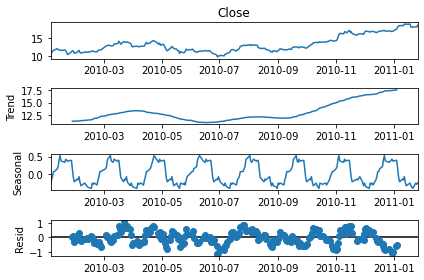

In [272]:
# Ejemplo de descomposición de serie de tiempo
#aditivo o multiplicativo tipo de modelo
descomposicion = sm.tsa.seasonal_decompose(df["Close"].dropna(),model='additive', period=30)  
fig = descomposicion.plot()

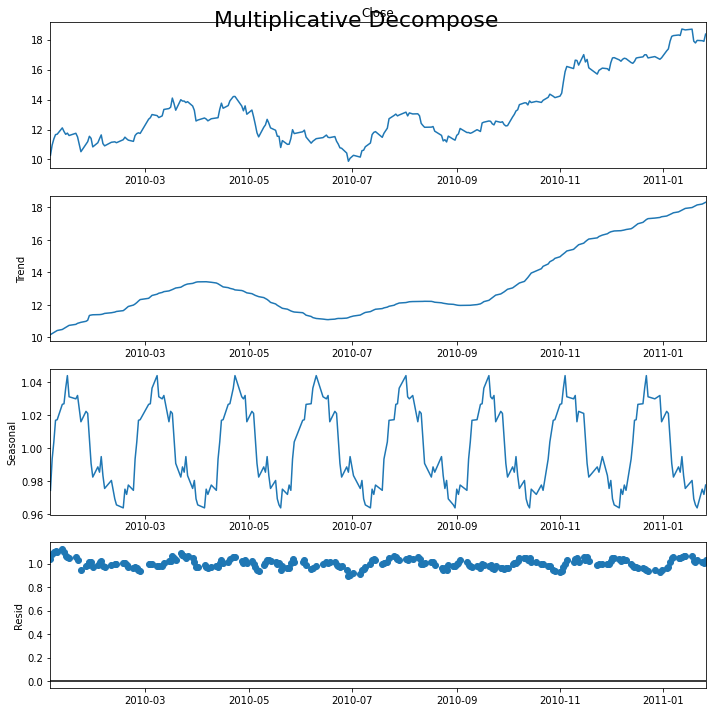

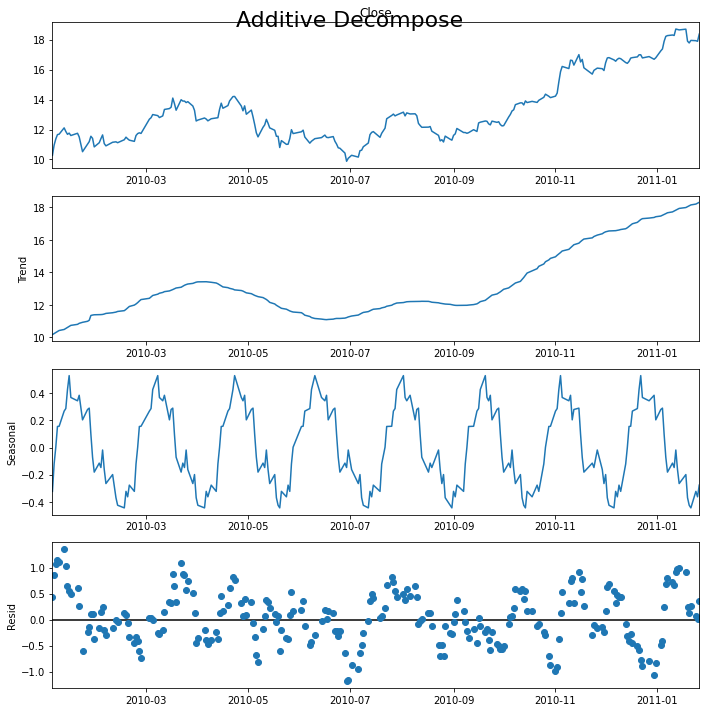

In [278]:
from statsmodels.tsa.seasonal import seasonal_decompose
#https://miningthedetails.com/blog/r/TimeSeriesDecomposition/

#El establecimiento de extrapolate_trend = 'freq' se ocupa de los valores perdidos en la tendencia 
#y los residuos al comienzo de la serie.
# Descomposición Multiplicativa
result_mul = seasonal_decompose(df['Close'].dropna(), model='multiplicative', extrapolate_trend='freq',period=30)

# Descomposición Aditiva
result_add = seasonal_decompose(df['Close'].dropna(), model='additive', extrapolate_trend='freq',period=30)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [279]:
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']

In [280]:
df_reconstructed

seas      trend     resid  actual_values
Date                                                    
2010-01-04  0.974358  10.168142  1.037607      10.280000
2010-01-05  0.993302  10.231016  1.078476      10.960000
2010-01-06  1.003705  10.293891  1.100462      11.370000
2010-01-07  1.016792  10.356765  1.107241      11.660000
2010-01-08  1.017186  10.419639  1.102964      11.690000
...              ...        ...       ...            ...
2011-01-20  0.965534  18.084356  1.018266      17.780001
2011-01-21  0.963717  18.137924  1.026899      17.950001
2011-01-24  0.975070  18.191492  1.010825      17.930000
2011-01-25  0.971894  18.245059  1.008896      17.889999
2011-01-26  0.977569  18.298627  1.026936      18.370001

[240 rows x 4 columns]

In [281]:
df_reconstructed["trend"].diff().mean()

0.03401876924922621

**Mann-Kendall Test**
- La prueba de tendencia de Mann Kendall (a veces llamada prueba MK ) se utiliza para analizar los datos recopilados a lo largo del tiempo para detectar tendencias crecientes o decrecientes
- La hipótesis nula de esta prueba es que no existe una tendencia monótona en la serie.
- La hipótesis alternativa es que existe una tendencia. Esta tendencia puede ser positiva, negativa o no nula.

- La prueba de tendencia de Mann-Kendall analiza la diferencia de signos entre puntos de datos anteriores y posteriores. La idea es que si hay una tendencia, los valores de los signos tenderán a aumentar o disminuir constantemente.

sudo pip install pymannkendall
https://pypi.org/project/pymannkendall/

- Ho: No existe tendencia a lo largo del tiempo en la variable evaluada
- Si p-valuez<alpha entonces rechazamos Ho

In [282]:
import numpy as np
import pymannkendall as mk
from scipy import stats


result = mk.original_test(df["Close"].dropna())
print(result)

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=11.386166321105046, Tau=0.49358437935843796, s=14156.0, var_s=1545484.6666666667, slope=0.023626372054382994, intercept=9.861648482280774)


**MISSINGS**

In [283]:
df[["Close"]].iplot(kind="scatter")

In [284]:
df=df.sort_values("Date")

In [285]:
df

High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2010-01-04  10.280000  10.050000  10.170000  10.280000   60855800   6.852576
2010-01-05  11.240000  10.400000  10.450000  10.960000  215620200   7.305861
2010-01-06  11.460000  11.130000  11.210000  11.370000  200070600   7.579160
2010-01-07  11.690000  11.320000  11.460000  11.660000  130201700   7.772474
2010-01-08  11.740000  11.460000  11.670000  11.690000  130463000   7.792470
...               ...        ...        ...        ...        ...        ...
2011-01-21  18.110001  17.870001  17.990000  17.950001   48717700  11.965346
2011-01-24  18.030001  17.750000  18.030001  17.930000   51698600  11.952010
2011-01-25  18.020000  17.660000  17.860001  17.889999   47155800  11.925349
2011-01-26  18.430000  17.900000  17.969999  18.370001   66834100  12.245312
2011-01-27  18.879999  18.330000  18.520000        NaN   67711700  12.525285

[270 rows x 6 columns]

In [286]:
#FFILL (ANTERIOR)
df["Close_ffill"]=df["Close"].fillna(method="ffill")

#BFILL (POSTERIOR)
df["Close_bfill"]=df["Close"].fillna(method="bfill")

In [287]:
completitud(df)

columna  total  completitud
0        Close     30    88.888889
1  Close_bfill      1    99.629630
2         High      0   100.000000
3          Low      0   100.000000
4         Open      0   100.000000
5       Volume      0   100.000000
6    Adj Close      0   100.000000
7  Close_ffill      0   100.000000

In [288]:
#http://www4.ujaen.es/~angelcid/Archivos/An_Met_Num_INFORMATICA/Splines.pdf
#Interpolación lineal
df["Int_l_Close"]=df["Close"].interpolate(method="linear")

In [289]:
df[["Close"]].iplot(kind="scatter")

In [290]:
df[["Int_l_Close"]].iplot(kind="scatter")

In [291]:
#Spline 
df["Spline_Close"]=df["Close"].interpolate(method="spline",order=2)

In [292]:
df[["Spline_Close"]].iplot(kind="scatter")

# LINK TESTS
https://help.xlstat.com/s/article/que-prueba-estadistica-deberia-utilizar?language=es